# Анализ результатов экзаменов по информатике

## Импорт библиотек

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from google.colab import drive

import plotly.express as px
import plotly.graph_objects as go

## Загрузка данных

In [2]:
# Пути к файлам в Kaggle
data_ege = pd.read_csv('/kaggle/input/ege-oge-results/ege_2022.csv', sep=';')
data_geo = pd.read_csv('/kaggle/input/ege-oge-results/geo.csv', sep=',')
data_oge = pd.read_csv('/kaggle/input/ege-oge-results/oge.csv', sep=';')
data_codificator = pd.read_csv('/kaggle/input/ege-oge-results/oge.csv', sep=';')

# Анализ ЕГЕ

## Статистика по баллам

### Распределение по первичному баллу

Гипотеза: "Двоечников" и "Отличинков" меньше чем тех, у кого средний результат

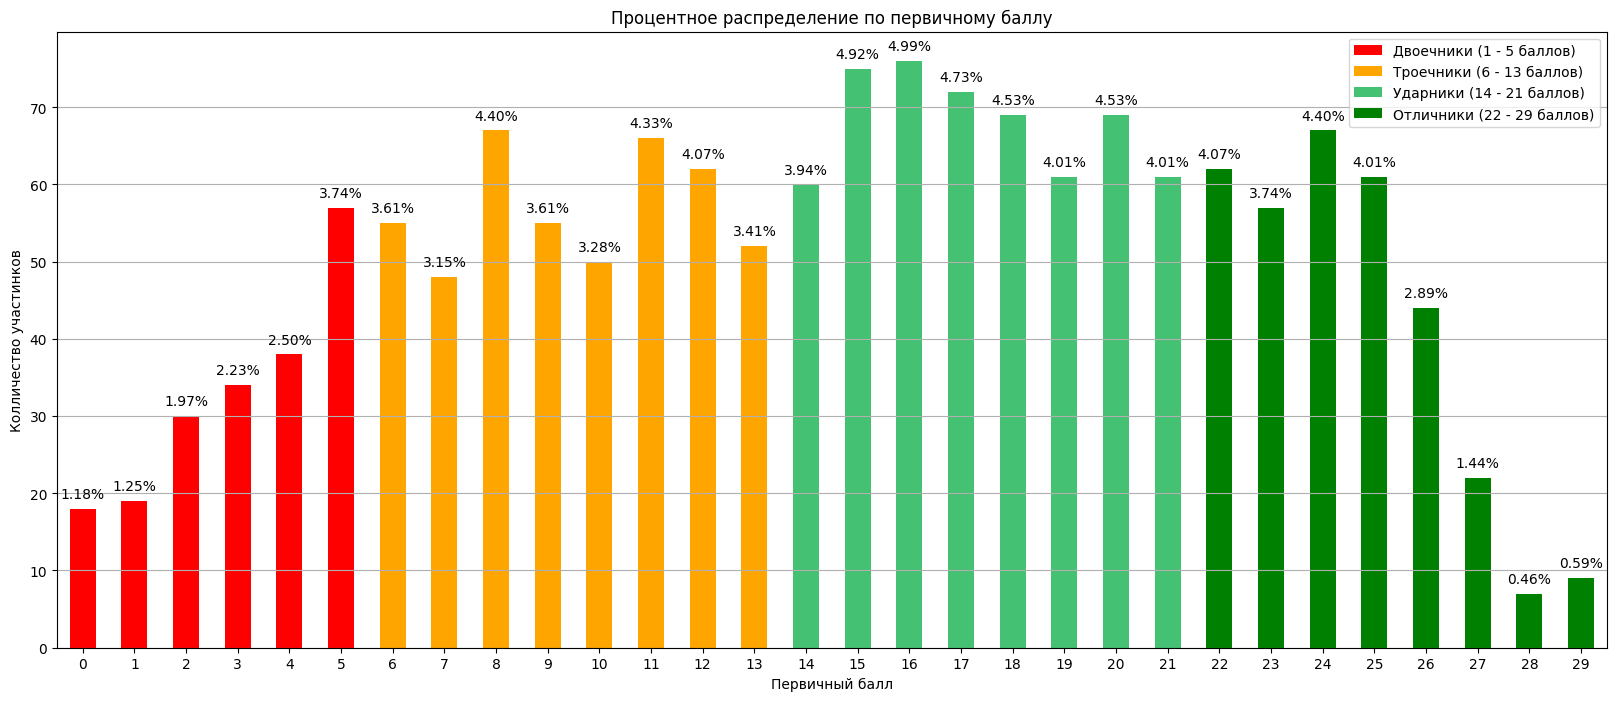

In [3]:
# Рассчет процентного соотношения
score_counts = data_ege['Первичный балл'].value_counts().sort_index()
total_people = score_counts.sum()

colors = ['red' if score < 6 else 'orange' if score < 14 else '#44c173' if score < 22 else 'green' for score in
          score_counts.index]

# Построение столбчатой диаграммы
plt.figure(figsize=(20, 8))
score_counts.plot(kind='bar', color=colors)
plt.xlabel('Первичный балл')
plt.ylabel('Колличество участинков')
plt.title('Процентное распределение по первичному баллу')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Добавление процентных значений над столбцами с округлением до 2 знаков после запятой
for index, value in enumerate(score_counts):
    plt.text(index, value + 1, f'{(value / total_people) * 100 :.2f}%', ha='center', va='bottom')

# Создание легенды
legend_elements = [
    Patch(facecolor='red', label='Двоечники (1 - 5 баллов)'),
    Patch(facecolor='orange', label='Троечники (6 - 13 баллов)'),
    Patch(facecolor='#44c173', label='Ударники (14 - 21 баллов)'),
    Patch(facecolor='green', label='Отличники (22 - 29 баллов)')
]

plt.legend(handles=legend_elements)

plt.show()

### Распределение по вторичному баллу

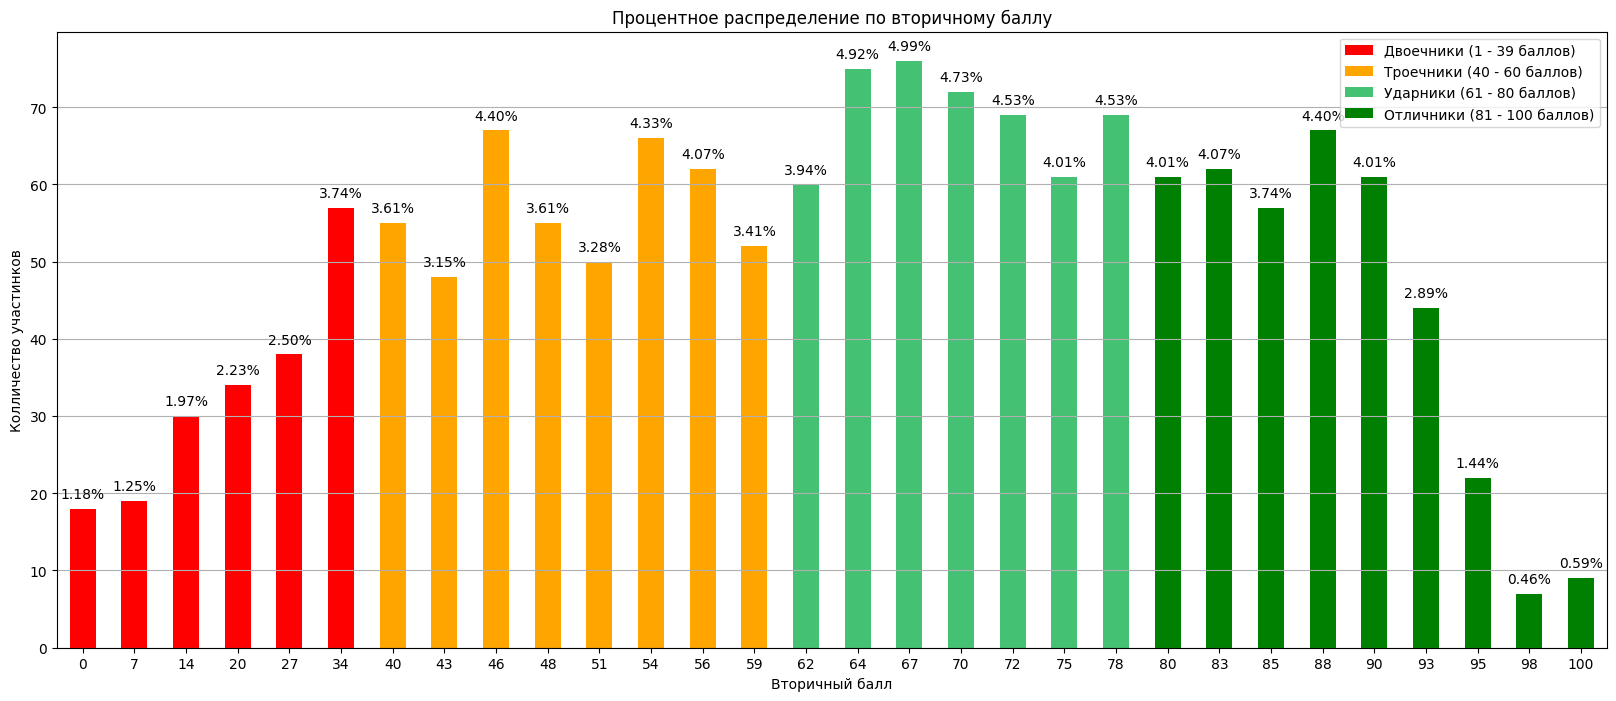

In [4]:
# Рассчет процентного соотношения
score_counts = data_ege['Балл'].value_counts().sort_index()
total_people = score_counts.sum()

colors = ['red' if score < 40 else 'orange' if score < 60 else '#44c173' if score < 80 else 'green' for score in
          score_counts.index]

# Построение столбчатой диаграммы
plt.figure(figsize=(20, 8))
score_counts.plot(kind='bar', color=colors)
plt.xlabel('Вторичный балл')
plt.ylabel('Колличество участинков')
plt.title('Процентное распределение по вторичному баллу')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Добавление процентных значений над столбцами с округлением до 2 знаков после запятой
for index, value in enumerate(score_counts):
    plt.text(index, value + 1, f'{(value / total_people) * 100 :.2f}%', ha='center', va='bottom')

# Создание легенды
legend_elements = [
    Patch(facecolor='red', label='Двоечники (1 - 39 баллов)'),
    Patch(facecolor='orange', label='Троечники (40 - 60 баллов)'),
    Patch(facecolor='#44c173', label='Ударники (61 - 80 баллов)'),
    Patch(facecolor='green', label='Отличники (81 - 100 баллов)')
]

plt.legend(handles=legend_elements)

plt.show()

Как видно из диаграмм, действительно, большинство получили средний результат

### Выполненные задания


Гипотеза: Чем выше уровень сложности задания, тем меньше процент её решения

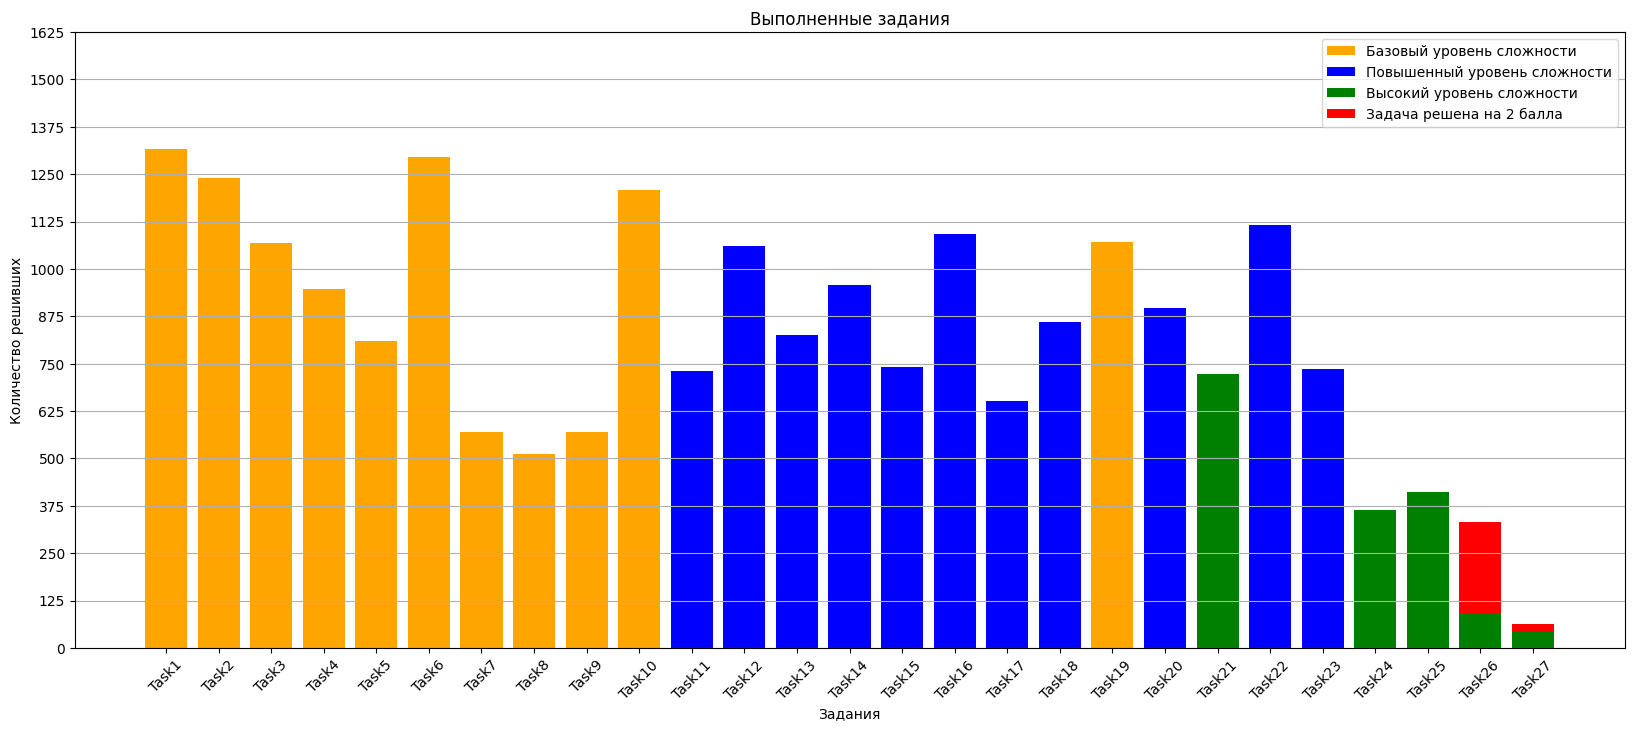

In [5]:
# Создание имен заданий и подсчёт количества людей, решивших каждую задачу на 1 и 2 балла
task_names = data_ege.columns[5:].tolist()
task_counts_1 = (data_ege.iloc[:, 5:] >= 1).sum()
task_counts_2 = (data_ege.iloc[:, 5:] == 2).sum()

# Создание массива цветов для групп задач
colors = ['orange'] * 10 + ['blue'] * 8 + ['orange'] + ['blue'] + ['green'] + ['blue'] * 2 + ['green'] * 4

# Создание сложенной столбчатой диаграммы
plt.figure(figsize=(20, 8))
p1 = plt.bar(task_names, task_counts_1 - task_counts_2, color=colors)
p2 = plt.bar(task_names, task_counts_2, bottom=task_counts_1 - task_counts_2, color='red')


# Добавление подписей, заголовка, меток и легенды
plt.ylabel('Количество решивших')
plt.xlabel('Задания')
plt.title('Выполненные задания')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1750, 125))
plt.grid(axis='y')
plt.legend((p1[0], p1[11], p1[26], p2[0]), (
    'Базовый уровень сложности', 'Повышенный уровень сложности', 'Высокий уровень сложности',
    'Задача решена на 2 балла'))

plt.show()

26 Задачу решило всего 333 человека, из них 240 решили на 2 балла, а 93 на 1.

27 Задачу решило 64 человека, 20 из них решили на 2 балла, а 44 на 1.

Гипотеза доказывается частично. Действительно, в среднем задания с базовым уровнем сложности решили больше людей, но также есть исключения, в виде 7,8 и 9 задачи, которых решило небольшое колличество участников ЕГЕ

### Вывод

В 2022 году, в еге по информатике, 27 задача оказалась "гробовой".

Также непростыми оказались 7, 8 и 9 задача, хоть они и имеют базовый уровень сложности.

## Cтатистика по районам и зависимость от расстояния

In [6]:
# Извлекаем первые три цифры из Код ОО и создаем новый столбец
data_ege['Короткое ОО'] = data_ege['Код ОО'].astype(str).str[:3].astype(int)
# Объединяем таблицы по условию: первые три цифры Код ОО равны Коду района
merged_data_ege_geo = pd.merge(data_ege, data_geo, left_on='Короткое ОО', right_on='Код района', how='left')

### Средний балл по районам

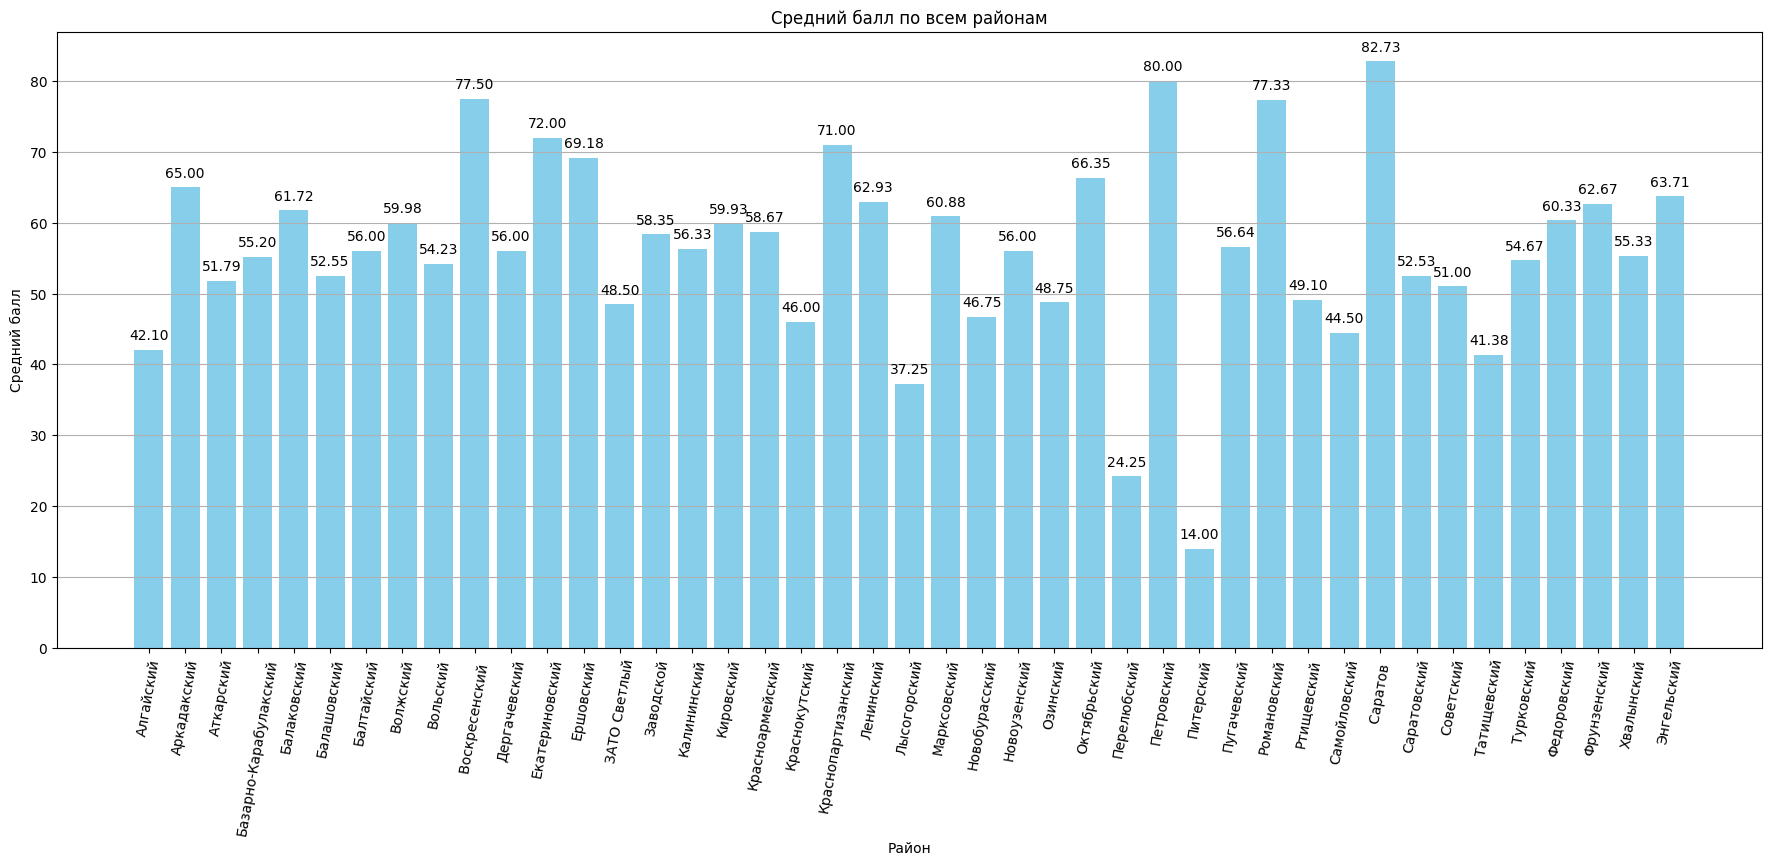

In [7]:
avg_scores_district = merged_data_ege_geo.groupby('Район')['Балл'].mean().reset_index()
# Построение графика
plt.figure(figsize=(22, 8))
bars = plt.bar(avg_scores_district['Район'], avg_scores_district['Балл'], color='skyblue')
plt.xlabel('Район')
plt.ylabel('Средний балл')
plt.title('Средний балл по всем районам')
plt.xticks(rotation=80)
plt.grid(axis='y')

# Добавление значений над столбцами
for bar, value in zip(bars, avg_scores_district['Балл']):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### Средний балл по районам (более 10 участников)

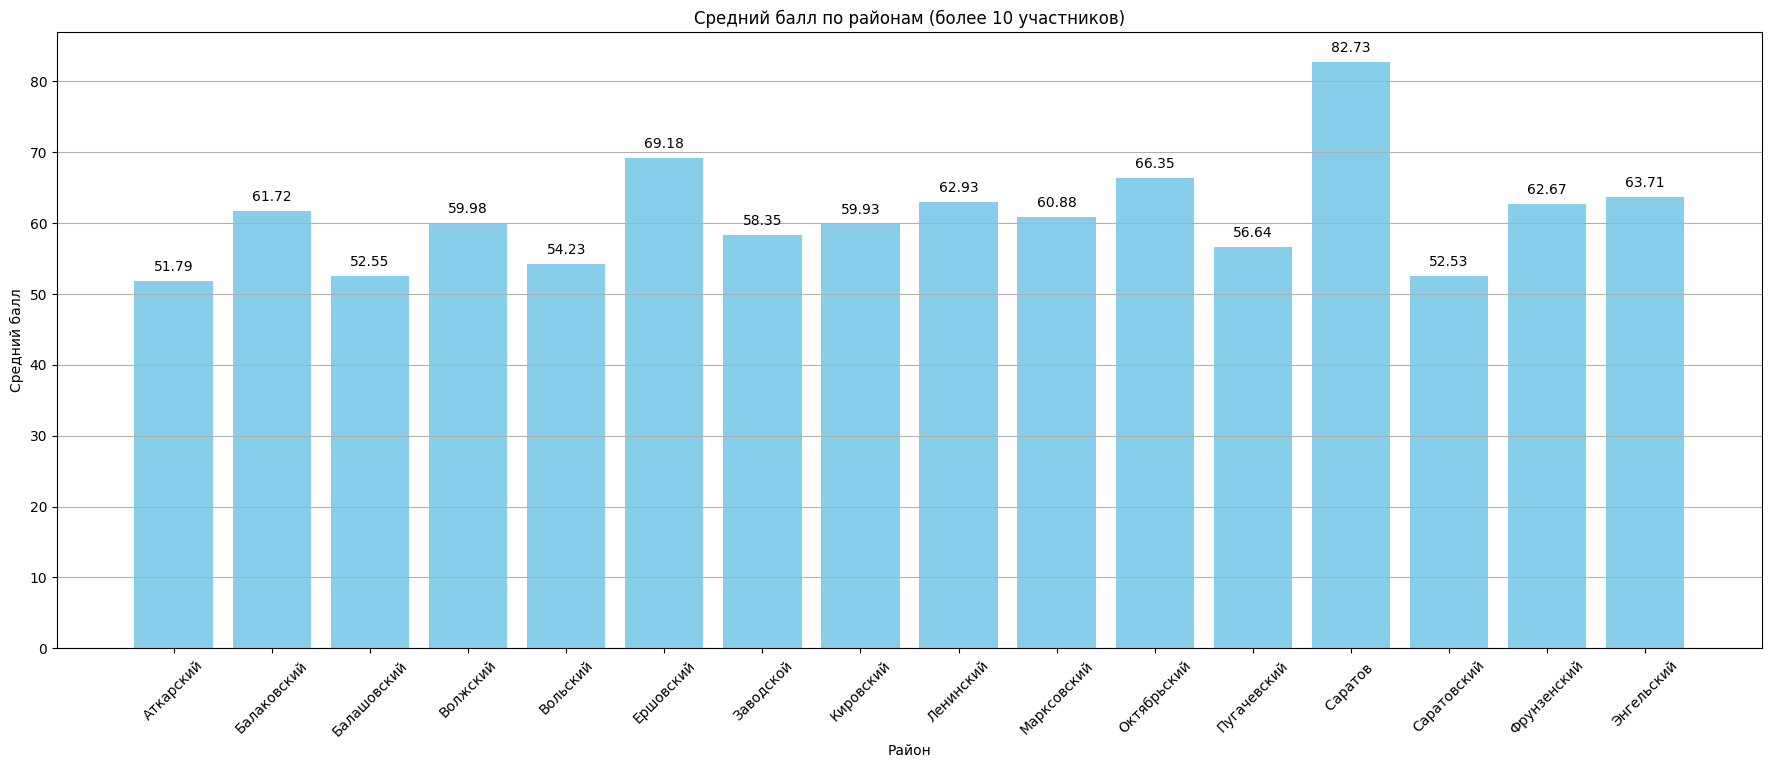

In [8]:
# Подсчет количества участников по районам
participants_count = merged_data_ege_geo['Район'].value_counts()

# Фильтрация данных: оставляем только районы, в которых сдали экзамен более 10 человек
filtered_data = merged_data_ege_geo[merged_data_ege_geo['Район'].isin(participants_count[participants_count > 10].index)]

# Расчет среднего балла по районам
avg_score = filtered_data.groupby('Район')['Балл'].mean().reset_index()

# Построение графика
plt.figure(figsize=(22, 8))
bars = plt.bar(avg_score['Район'], avg_score['Балл'], color='skyblue')
plt.xlabel('Район')
plt.ylabel('Средний балл')
plt.title('Средний балл по районам (более 10 участников)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Добавление значений над столбцами
for bar, value in zip(bars, avg_score['Балл']):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### Зависимость среднего балла от расстояния до Саратова

Гипотеза: Средний балл зависит от расстояния до Саратова

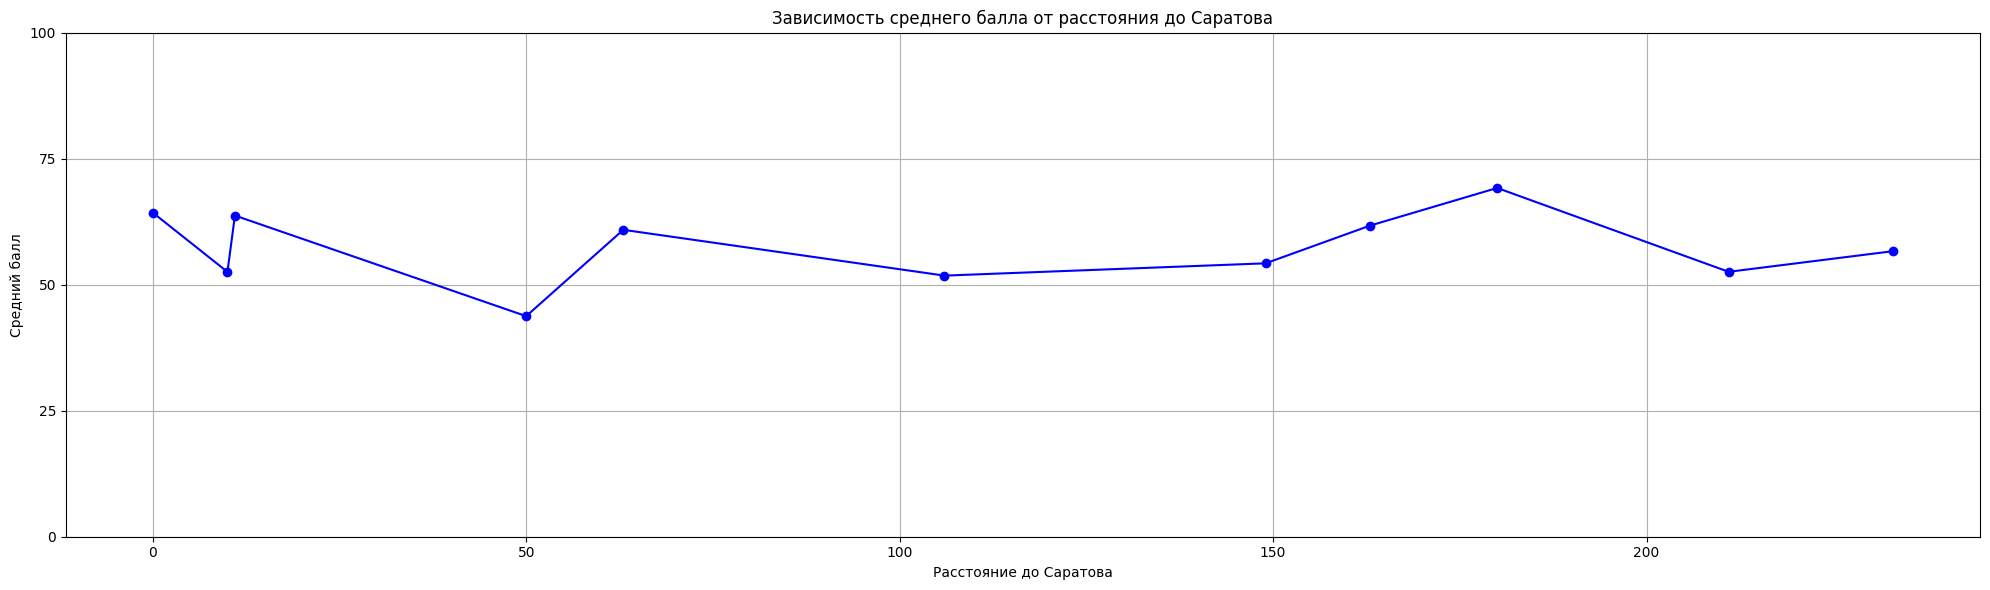

In [9]:
participants_count = merged_data_ege_geo['Расстояние до Саратова'].value_counts()

# Фильтрация данных: оставляем только районы, в которых сдали экзамен более 10 человек
filtered_data = merged_data_ege_geo[merged_data_ege_geo['Расстояние до Саратова'].isin(participants_count[participants_count > 10].index)]

avg_scores_Distance = filtered_data.groupby('Расстояние до Саратова')['Балл'].mean().reset_index()
avg_scores_Distance
# Построение графика
plt.figure(figsize=(20, 6))
plt.plot(avg_scores_Distance['Расстояние до Саратова'], avg_scores_Distance['Балл'], marker='o', linestyle='-', color='b')
plt.xlabel('Расстояние до Саратова')
plt.ylabel('Средний балл')
plt.title('Зависимость среднего балла от расстояния до Саратова')
plt.grid(True)
plt.yticks(np.arange(0, 125, 25))
plt.tight_layout()

plt.show()

Средний балл по еге информатике в Саратовской области не зависит от расстояния от Саратов. Гипотеза опровергнута

## Статистика по видам школ

Гипотеза: Гимназии и лицеи имеют болле высокий средний балл

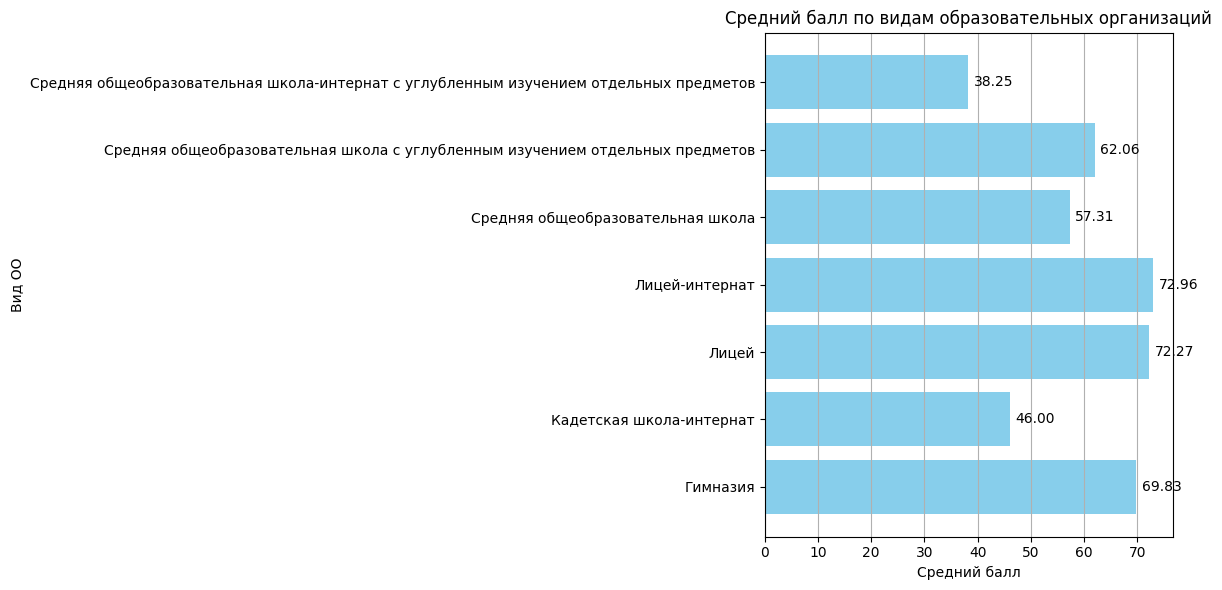

In [10]:
oge_code_oo = data_oge[['Код ОО', 'Вид ОО']]
merged_data_ege_oge = pd.merge(data_ege, oge_code_oo, on='Код ОО', how='left')

avg_score_type_oo = merged_data_ege_oge.groupby('Вид ОО')['Балл'].mean().reset_index()
# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
plt.barh(avg_score_type_oo['Вид ОО'], avg_score_type_oo['Балл'], color='skyblue')
plt.xlabel('Средний балл')
plt.ylabel('Вид ОО')
plt.title('Средний балл по видам образовательных организаций')
plt.grid(axis='x')

# Добавление значений баллов на график
for index, value in enumerate(avg_score_type_oo['Балл']):
    plt.text(value + 1, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()

Как видно в диаграмме, действительно, ученики из гимназий и лицеев справились с ЕГЕ лучше

## "Профили" отличников, хорошистов, двоечников

### Разделение данных

In [11]:
bad_student = data_ege[data_ege['Балл'] < 40]
so_so_student = data_ege[(data_ege['Балл'] >= 40) & (data_ege['Балл'] <= 80)]
well_student = data_ege[data_ege['Балл'] > 80]

### "Профили" двоечников

Гипотеза: Двоечники "набирали" баллы больше всего на заданиях с базовым уровнем сложности

In [12]:
bad_student.shape[0]

196

Всего "двоичников" оказалось 196 человек

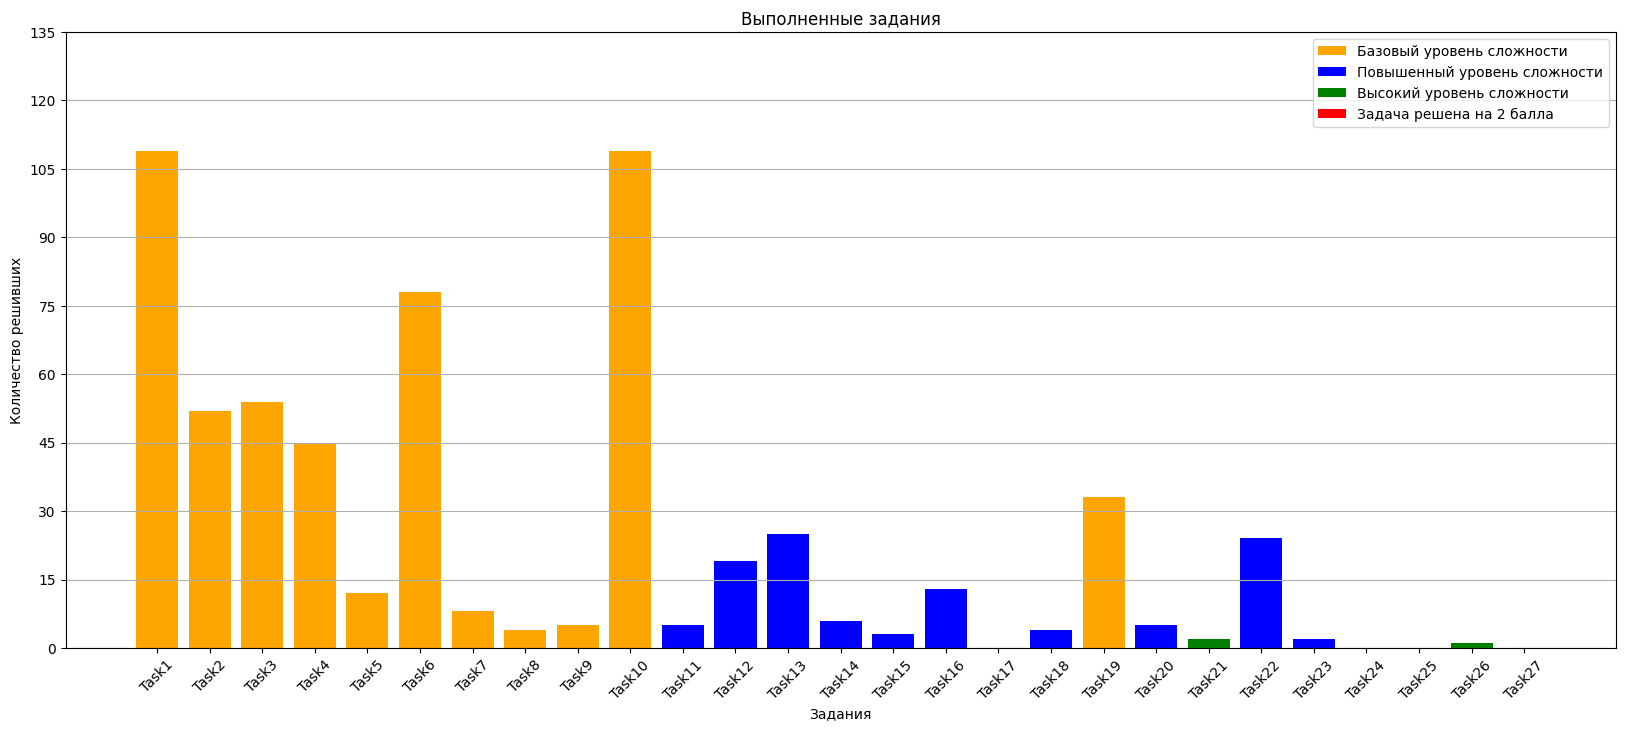

In [13]:
# Создание имен заданий и подсчёт количества людей, решивших каждую задачу на 1 и 2 балла
task_names = bad_student.columns[5:-1].tolist()
task_counts_1 = (bad_student.iloc[:, 5:-1] >= 1).sum()
task_counts_2 = (bad_student.iloc[:, 5:-1] == 2).sum()

# Создание массива цветов для групп задач
colors = ['orange'] * 10 + ['blue'] * 8 + ['orange'] + ['blue'] + ['green'] + ['blue'] * 2 + ['green'] * 4

# Создание сложенной столбчатой диаграммы
plt.figure(figsize=(20, 8))
p1 = plt.bar(task_names, task_counts_1 - task_counts_2, color=colors)
p2 = plt.bar(task_names, task_counts_2, bottom=task_counts_1 - task_counts_2, color='red')


# Добавление подписей, заголовка, меток и легенды
plt.ylabel('Количество решивших')
plt.xlabel('Задания')
plt.title('Выполненные задания')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 150, 15))
plt.grid(axis='y')
plt.legend((p1[0], p1[11], p1[26], p2[0]), (
    'Базовый уровень сложности', 'Повышенный уровень сложности', 'Высокий уровень сложности',
    'Задача решена на 2 балла'))

plt.show()

Ни один "Двоечник" не смог решить 17, 24, 25, 27 задание

Гипотеза подтверждается, как видно из диаграммы, большинство "двоечников" "набирали" баллы из лёгких заданий

### Профили хорошистов

In [14]:
so_so_student.shape[0]

998

"Хорошистов" всего оказалось 998 человек

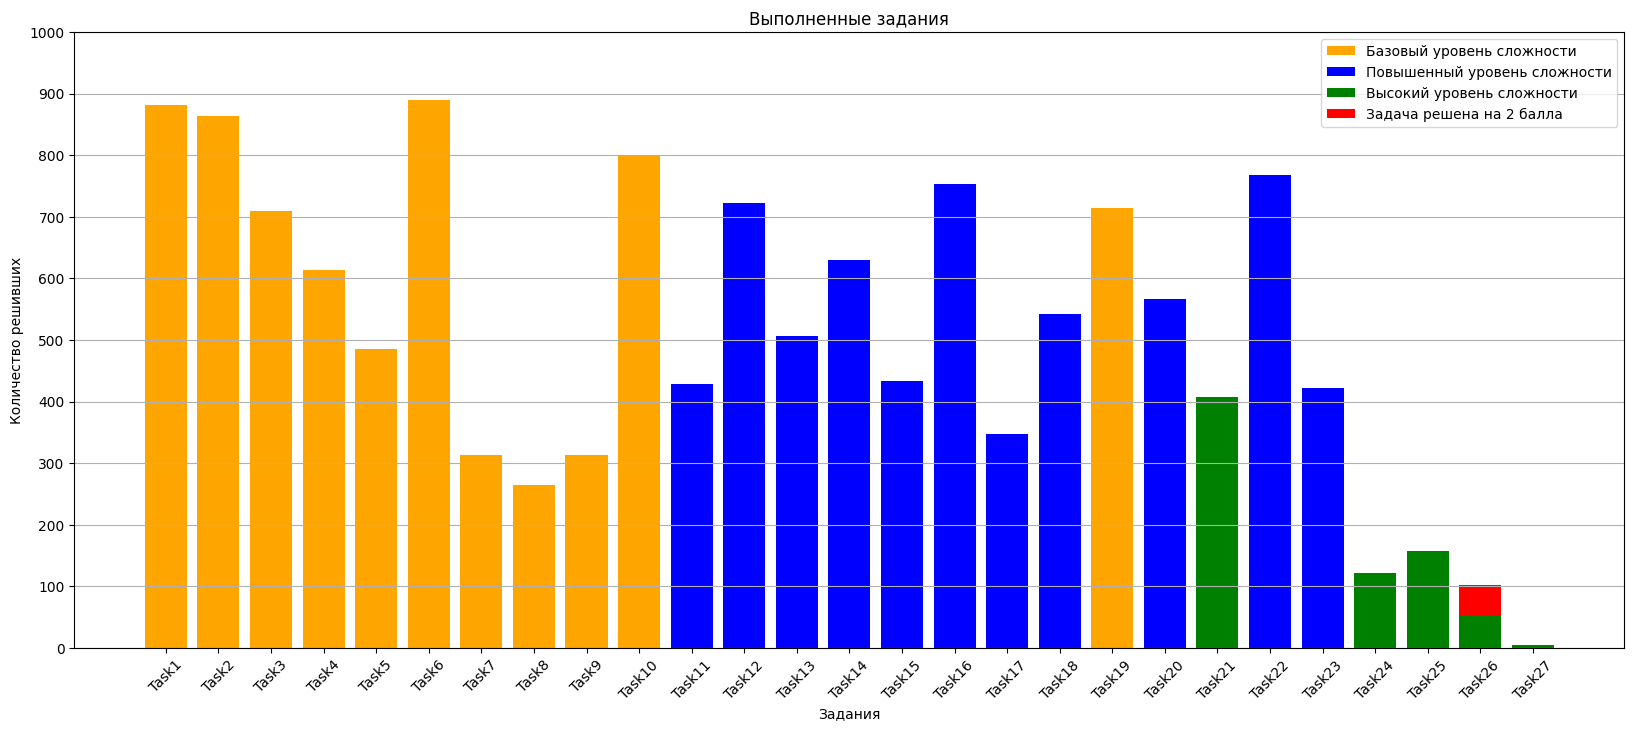

In [15]:
# Создание имен заданий и подсчёт количества людей, решивших каждую задачу на 1 и 2 балла
task_names = so_so_student.columns[5:-1].tolist()
task_counts_1 = (so_so_student.iloc[:, 5:-1] >= 1).sum()
task_counts_2 = (so_so_student.iloc[:, 5:-1] == 2).sum()

# Создание массива цветов для групп задач
colors = ['orange'] * 10 + ['blue'] * 8 + ['orange'] + ['blue'] + ['green'] + ['blue'] * 2 + ['green'] * 4

# Создание сложенной столбчатой диаграммы
plt.figure(figsize=(20, 8))
p1 = plt.bar(task_names, task_counts_1 - task_counts_2, color=colors)
p2 = plt.bar(task_names, task_counts_2, bottom=task_counts_1 - task_counts_2, color='red')


# Добавление подписей, заголовка, меток и легенды
plt.ylabel('Количество решивших')
plt.xlabel('Задания')
plt.title('Выполненные задания')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1100, 100))
plt.grid(axis='y')
plt.legend((p1[0], p1[11], p1[26], p2[0]), (
    'Базовый уровень сложности', 'Повышенный уровень сложности', 'Высокий уровень сложности',
    'Задача решена на 2 балла'))

plt.show()

### Профили отличников

In [16]:
well_student.shape[0]

329

"Отличников оказалось всего 329 человек

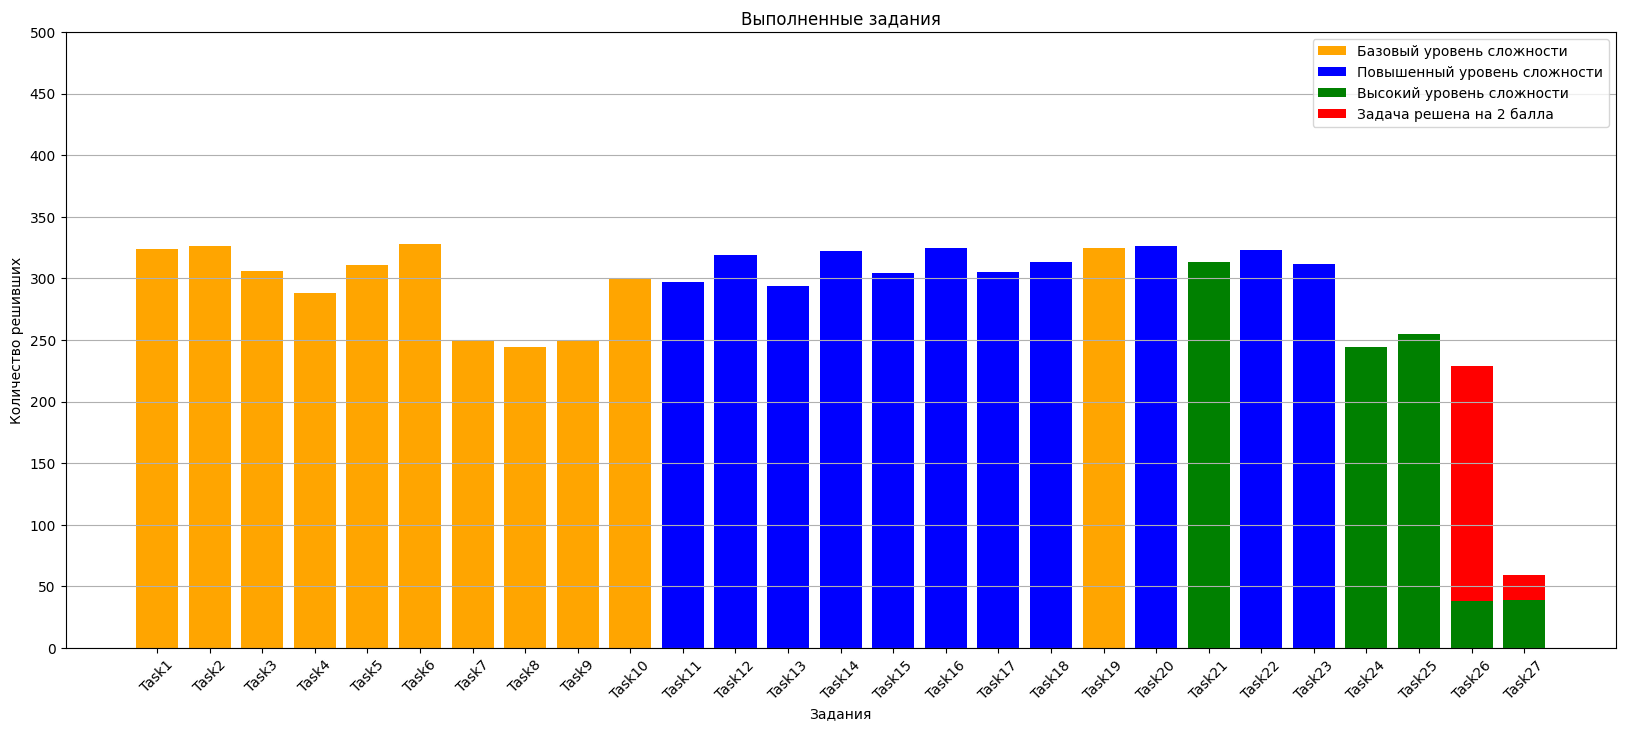

In [17]:
# Создание имен заданий и подсчёт количества людей, решивших каждую задачу на 1 и 2 балла
task_names = well_student.columns[5:-1].tolist()
task_counts_1 = (well_student.iloc[:, 5:-1] >= 1).sum()
task_counts_2 = (well_student.iloc[:, 5:-1] == 2).sum()

# Создание массива цветов для групп задач
colors = ['orange'] * 10 + ['blue'] * 8 + ['orange'] + ['blue'] + ['green'] + ['blue'] * 2 + ['green'] * 4

# Создание сложенной столбчатой диаграммы
plt.figure(figsize=(20, 8))
p1 = plt.bar(task_names, task_counts_1 - task_counts_2, color=colors)
p2 = plt.bar(task_names, task_counts_2, bottom=task_counts_1 - task_counts_2, color='red')


# Добавление подписей, заголовка, меток и легенды
plt.ylabel('Количество решивших')
plt.xlabel('Задания')
plt.title('Выполненные задания')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 550, 50))
plt.grid(axis='y')
plt.legend((p1[0], p1[11], p1[26], p2[0]), (
    'Базовый уровень сложности', 'Повышенный уровень сложности', 'Высокий уровень сложности',
    'Задача решена на 2 балла'))

plt.show()

Для всех учеников самые тяжелые задания оказались 7, 8, 9 - из базового уровня сложности

И 24, 25, 26, 27 - из повышенного уровня сложности

## 100-Бальники

In [18]:
hundred_student = data_ege[data_ege['Балл'] == 100]['Код ОО']
hundred_student = hundred_student.replace(241036, 251036) # Ошибка в данных

In [19]:
hundred_student.shape[0]

9

In [20]:
len(set(hundred_student))

6

Всеого 100 бальников в 2022 по еге информатике в Саратовской области 9 человек из 6 образовательных учреждений

### Образовательные учреждения 100-бальников:

In [21]:
schools_with_hundred_students = data_codificator[data_codificator['Код ОО'].isin(hundred_student)]

### Районы 100-бальников:

In [22]:
hundred_student_short = data_ege[data_ege['Балл'] == 100]['Короткое ОО']
region_with_hundred_students = data_geo[data_geo['Код района'].isin(hundred_student_short)]
print('\n'.join(region_with_hundred_students['Район']))

Балаковский
Саратов 
Волжский
Фрунзенский
Ленинский


# Анализ ОГЕ

## Статистика по баллам и заданиям

Гипотеза: "Двоечников" и "Отличников" меньше, чем тех, у кого средний результат

### Распределение по первичному баллу

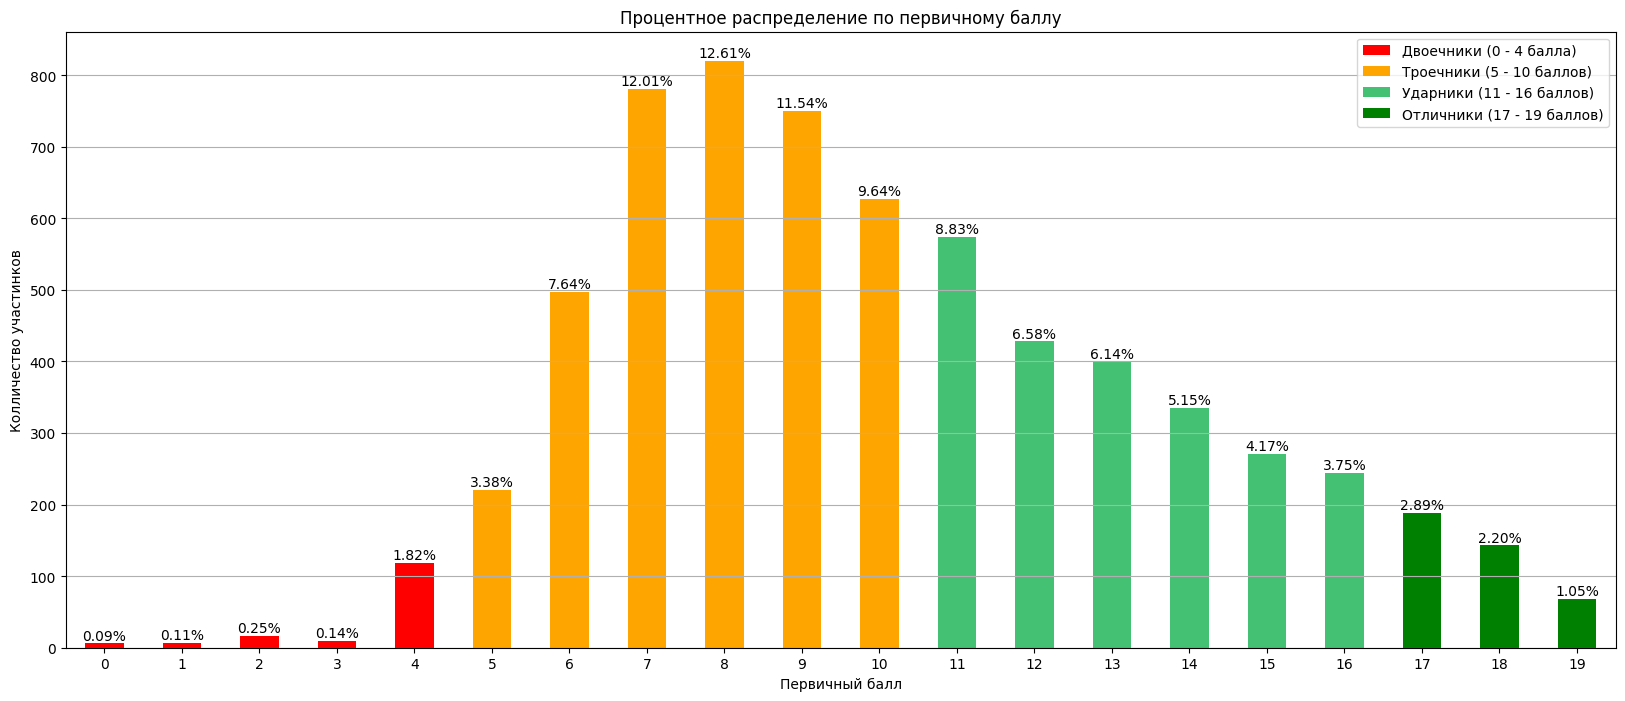

In [23]:
# Рассчет процентного соотношения
score_counts = data_oge['Первичный балл'].value_counts().sort_index()
total_people = score_counts.sum()

colors = ['red' if score < 5 else 'orange' if score < 11 else '#44c173' if score < 17 else 'green' for score in
          score_counts.index]

# Построение столбчатой диаграммы
plt.figure(figsize=(20, 8))
score_counts.plot(kind='bar', color=colors)
plt.xlabel('Первичный балл')
plt.ylabel('Колличество участинков')
plt.title('Процентное распределение по первичному баллу')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Добавление процентных значений над столбцами с округлением до 2 знаков после запятой
for index, value in enumerate(score_counts):
    plt.text(index, value + 1, f'{(value / total_people) * 100 :.2f}%', ha='center', va='bottom')

# Создание легенды
legend_elements = [
    Patch(facecolor='red', label='Двоечники (0 - 4 балла)'),
    Patch(facecolor='orange', label='Троечники (5 - 10 баллов)'),
    Patch(facecolor='#44c173', label='Ударники (11 - 16 баллов)'),
    Patch(facecolor='green', label='Отличники (17 - 19 баллов)')
]

plt.legend(handles=legend_elements)

plt.show()

### Распределение по оценкам

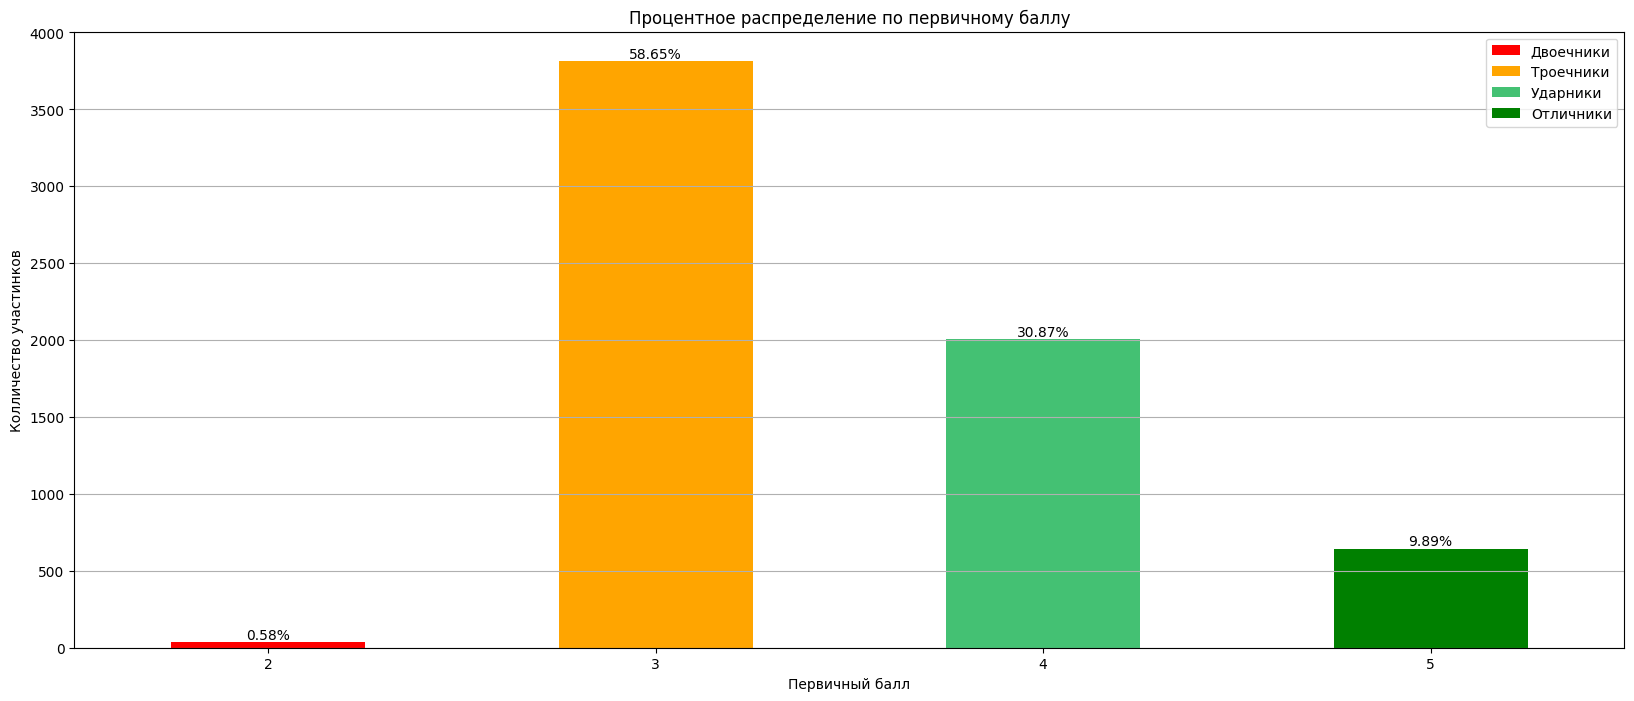

In [24]:
# Рассчет процентного соотношения
score_counts = data_oge['Оцека по 5'].value_counts().sort_index()
total_people = score_counts.sum()

colors = ['red' if score < 3 else 'orange' if score < 4 else '#44c173' if score < 5 else 'green' for score in
          score_counts.index]

# Построение столбчатой диаграммы
plt.figure(figsize=(20, 8))
score_counts.plot(kind='bar', color=colors)
plt.xlabel('Первичный балл')
plt.ylabel('Колличество участинков')
plt.title('Процентное распределение по первичному баллу')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Добавление процентных значений над столбцами с округлением до 2 знаков после запятой
for index, value in enumerate(score_counts):
    plt.text(index, value + 1, f'{(value / total_people) * 100 :.2f}%', ha='center', va='bottom')

# Создание легенды
legend_elements = [
    Patch(facecolor='red', label='Двоечники'),
    Patch(facecolor='orange', label='Троечники'),
    Patch(facecolor='#44c173', label='Ударники'),
    Patch(facecolor='green', label='Отличники')
]

plt.legend(handles=legend_elements)

plt.show()

Как видно из диаграмм, гипотеза правдива

### Выполненные задания


In [25]:
def map_values(x):
    if x == '+' or x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    else:
        return 0


data_oge.columns = data_oge.columns.str.replace('_Часть', ' Задание')

# Создание имен заданий и подсчёт количества людей, решивших каждую задачу на 1 и 2  и 3 балла
task_names = data_oge.columns[9:21].tolist() + data_oge.columns[22:25].tolist()

for column in task_names:
    data_oge[column] = data_oge[column].map(map_values)

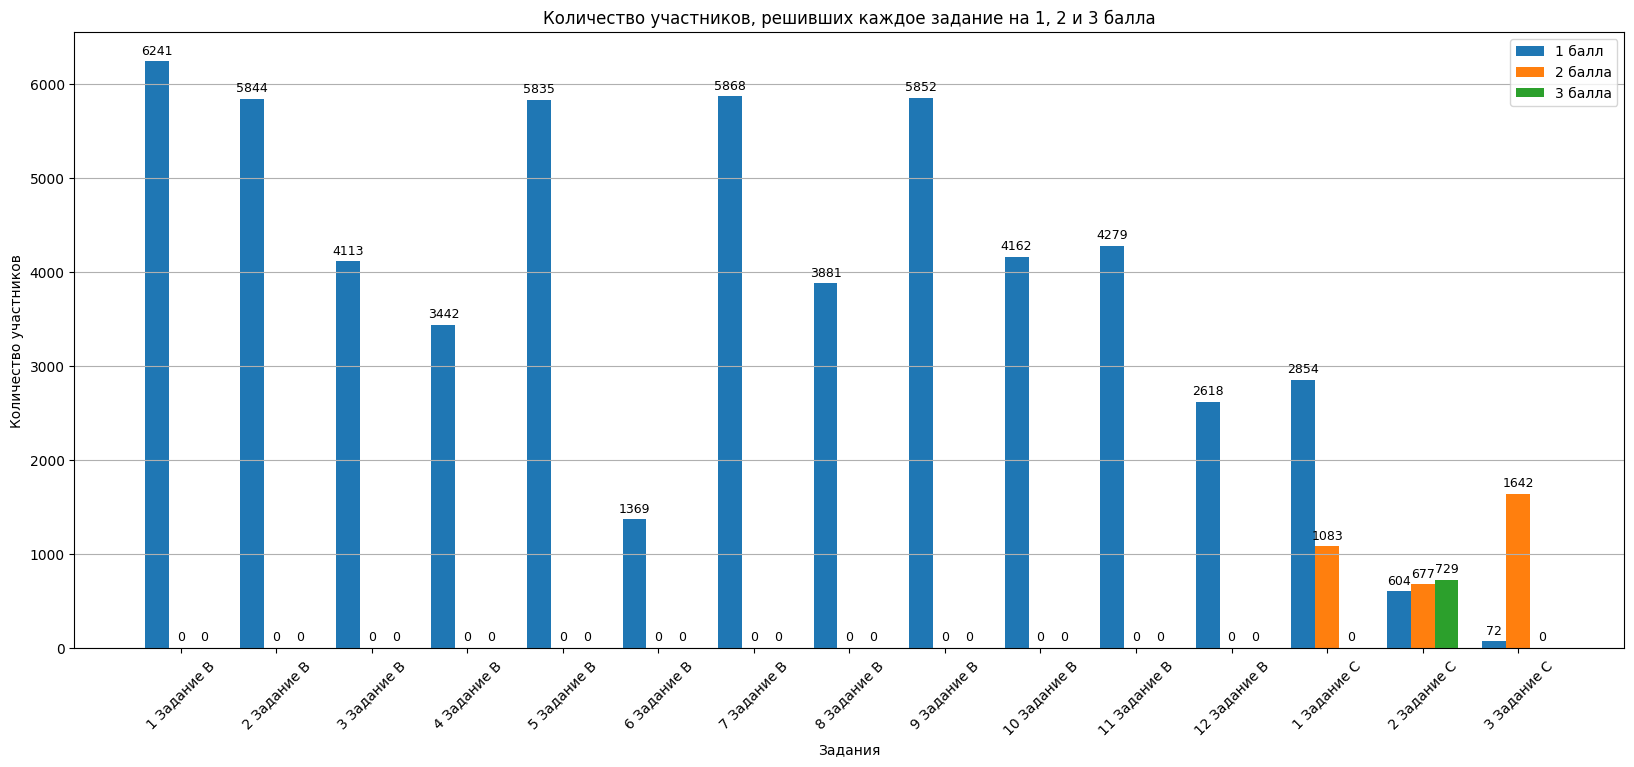

In [26]:
task_counts_1 = (data_oge[task_names] == 1).sum()
task_counts_2 = (data_oge[task_names] == 2).sum()
task_counts_3 = (data_oge[task_names] == 3).sum()

# Индексы и ширина столбцов
labels = task_counts_1.index
x = np.arange(len(labels))
width = 0.25

# Создание графика
fig, ax = plt.subplots(figsize=(20, 8))

rects1 = ax.bar(x - width, task_counts_1, width, label='1 балл')
rects2 = ax.bar(x, task_counts_2, width, label='2 балла')
rects3 = ax.bar(x + width, task_counts_3, width, label='3 балла')

# Добавление подписей
ax.set_xlabel('Задания')
ax.set_ylabel('Количество участников')
ax.set_title('Количество участников, решивших каждое задание на 1, 2 и 3 балла')
ax.set_xticks(x)
plt.grid(axis='y')
ax.set_xticklabels(labels, rotation=45)
ax.legend()


# Добавление значений над столбцами
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Смещение текста на 3 точки вверх
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)


add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.show()

3 задание из части C, тех кто решил задание на 2 балла, в 22 раза больше, чем те, кто на 1

### Вывод

В 2022 году, в ОГЕ по информатике, 6 задача из части B вызвала немало проблем.

## Cтатистика по районам и зависимость от расстояния

In [27]:
# Извлекаем первые три цифры из Код ОО и создаем новый столбец
data_oge['Короткое ОО'] = data_oge['Код ОО'].astype(str).str[:3].astype(int)
# Объединяем таблицы по условию: первые три цифры Код ОО равны Коду района
merged_data_oge_geo = pd.merge(data_oge, data_geo, left_on='Короткое ОО', right_on='Код района', how='left')

###Средний балл по районам

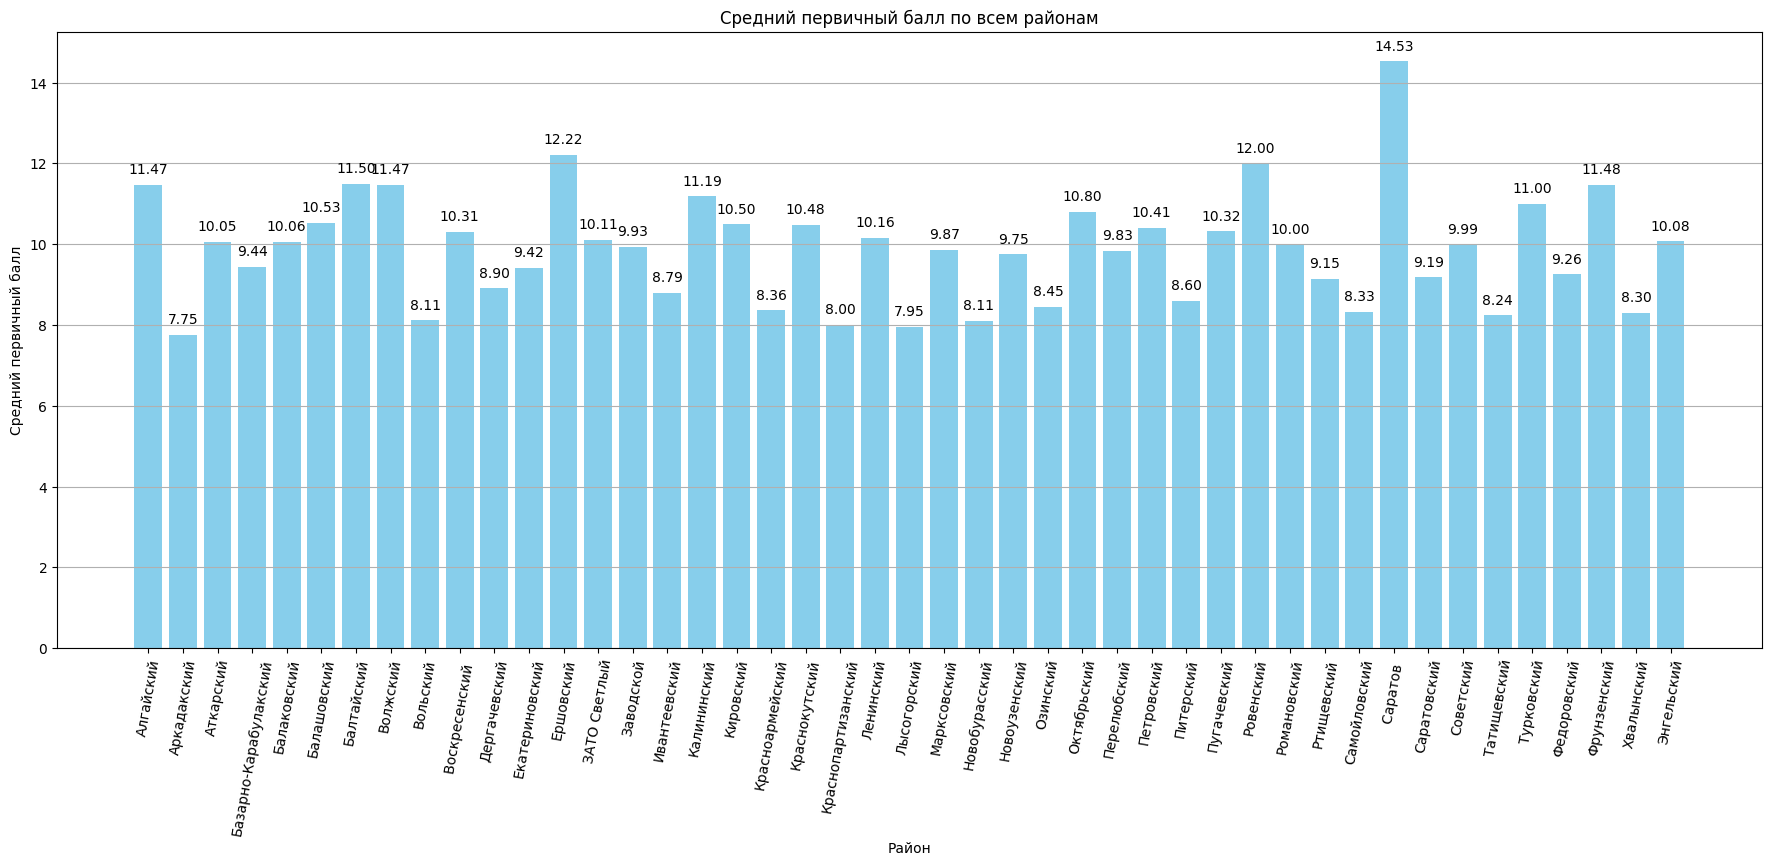

In [28]:
avg_scores_district = merged_data_oge_geo.groupby('Район')['Первичный балл'].mean().reset_index()
# Построение графика
plt.figure(figsize=(22, 8))
bars = plt.bar(avg_scores_district['Район'], avg_scores_district['Первичный балл'], color='skyblue')
plt.xlabel('Район')
plt.ylabel('Средний первичный балл')
plt.title('Средний первичный балл по всем районам')
plt.xticks(rotation=80)
plt.grid(axis='y')

# Добавление значений над столбцами
for bar, value in zip(bars, avg_scores_district['Первичный балл']):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.2, f'{value:.2f}', ha='center', va='bottom')

plt.show()


### Средний балл по районам (более 10 участников)

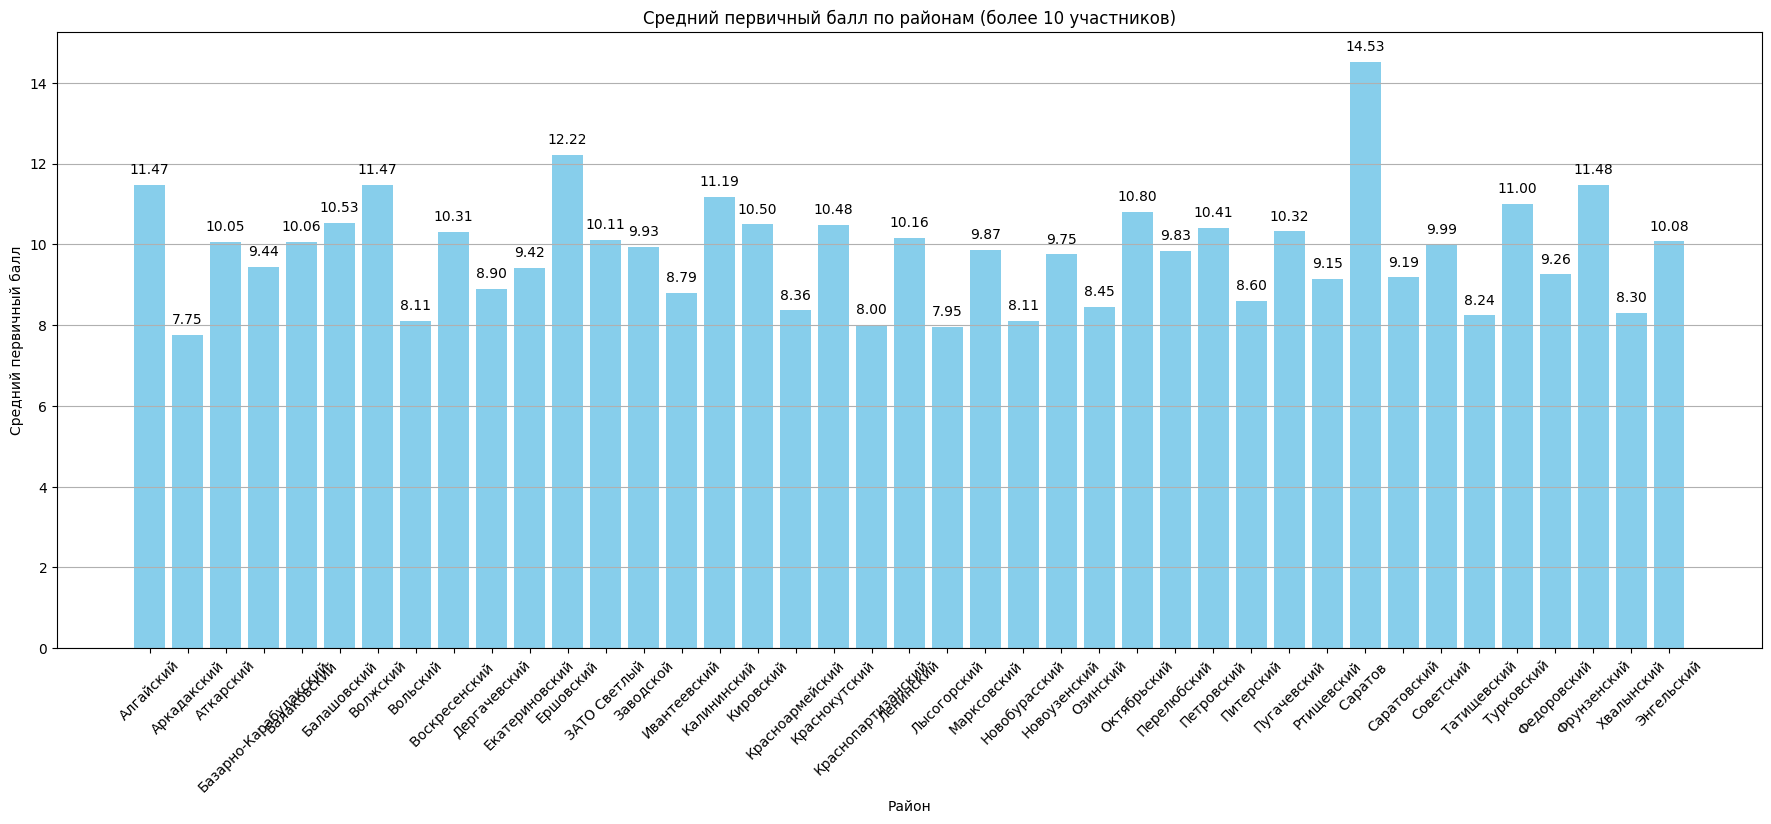

In [29]:
# Подсчет количества участников по районам
participants_count = merged_data_oge_geo['Район'].value_counts()


# Фильтрация данных: оставляем только районы, в которых сдали экзамен более 10 человек
filtered_data = merged_data_oge_geo[merged_data_oge_geo['Район'].isin(participants_count[participants_count > 10].index)]

# Расчет среднего балла по районам
avg_score = filtered_data.groupby('Район')['Первичный балл'].mean().reset_index()

# Построение графика
plt.figure(figsize=(22, 8))
bars = plt.bar(avg_score['Район'], avg_score['Первичный балл'], color='skyblue')
plt.xlabel('Район')
plt.ylabel('Средний первичный балл')
plt.title('Средний первичный балл по районам (более 10 участников)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Добавление значений над столбцами
for bar, value in zip(bars, avg_score['Первичный балл']):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.2, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### Зависимость среднего балла от расстояния до Саратова

Гипотеза: Средний балл зависит от расстояния до Саратова

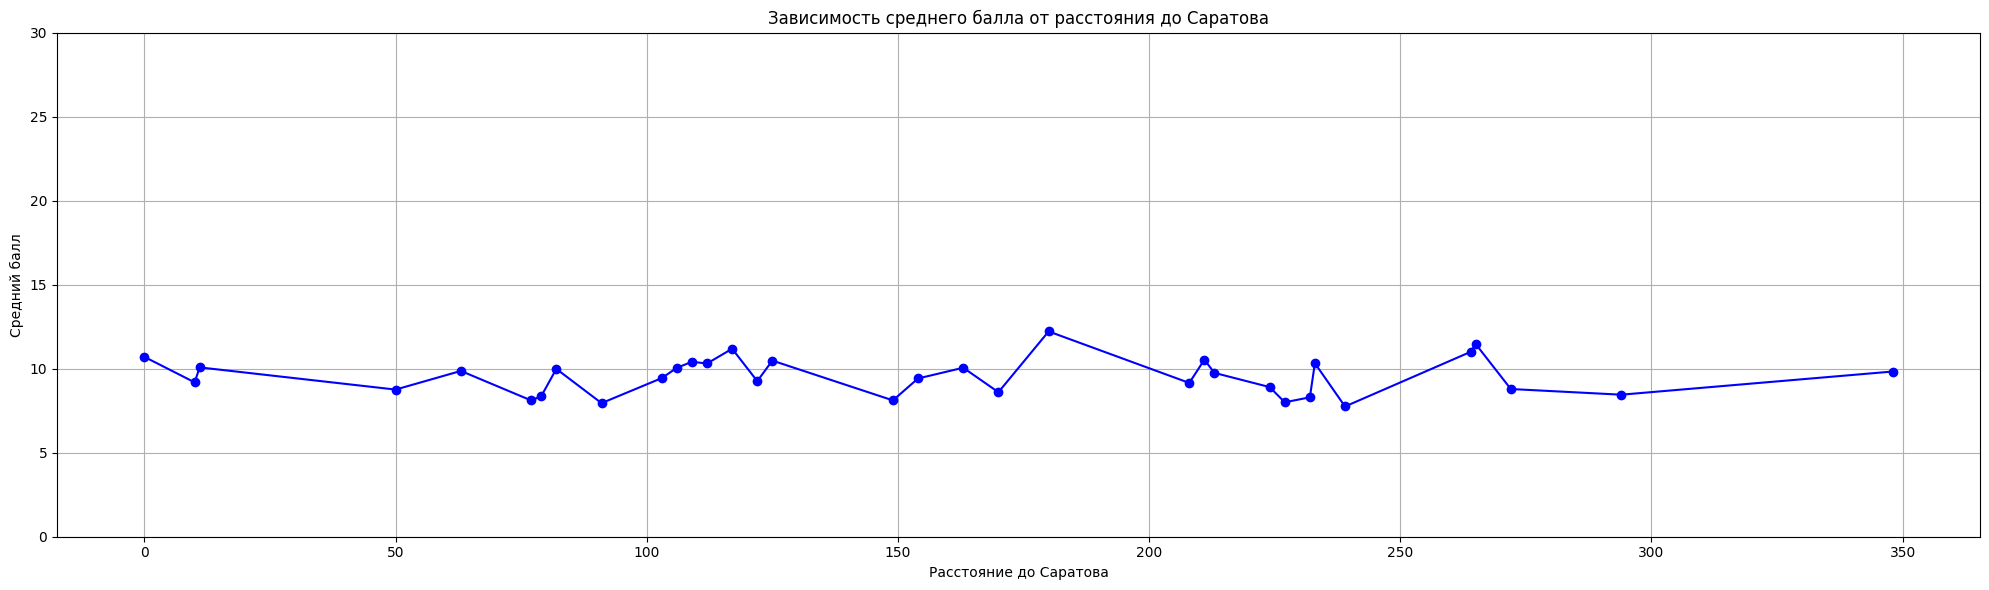

In [30]:
participants_count = merged_data_oge_geo['Расстояние до Саратова'].value_counts()

# Фильтрация данных: оставляем только районы, в которых сдали экзамен более 10 человек
filtered_data = merged_data_oge_geo[merged_data_oge_geo['Расстояние до Саратова'].isin(participants_count[participants_count > 10].index)]

avg_scores_Distance = filtered_data.groupby('Расстояние до Саратова')['Первичный балл'].mean().reset_index()
avg_scores_Distance
# Построение графика
plt.figure(figsize=(20, 6))
plt.plot(avg_scores_Distance['Расстояние до Саратова'], avg_scores_Distance['Первичный балл'], marker='o', linestyle='-', color='b')
plt.xlabel('Расстояние до Саратова')
plt.ylabel('Средний балл')
plt.title('Зависимость среднего балла от расстояния до Саратова')
plt.grid(True)
plt.yticks(np.arange(0, 35, 5))
plt.tight_layout()

plt.show()

Средний балл по оге информатике в Саратовской области не зависит от расстояния от Саратов. Гипотеза не подтвердилась

## Статистика по видам школ

Гипотеза: Средний балл учеников Гимназий и лицеев выше среднего балла учеников средних общеобразовательных школ

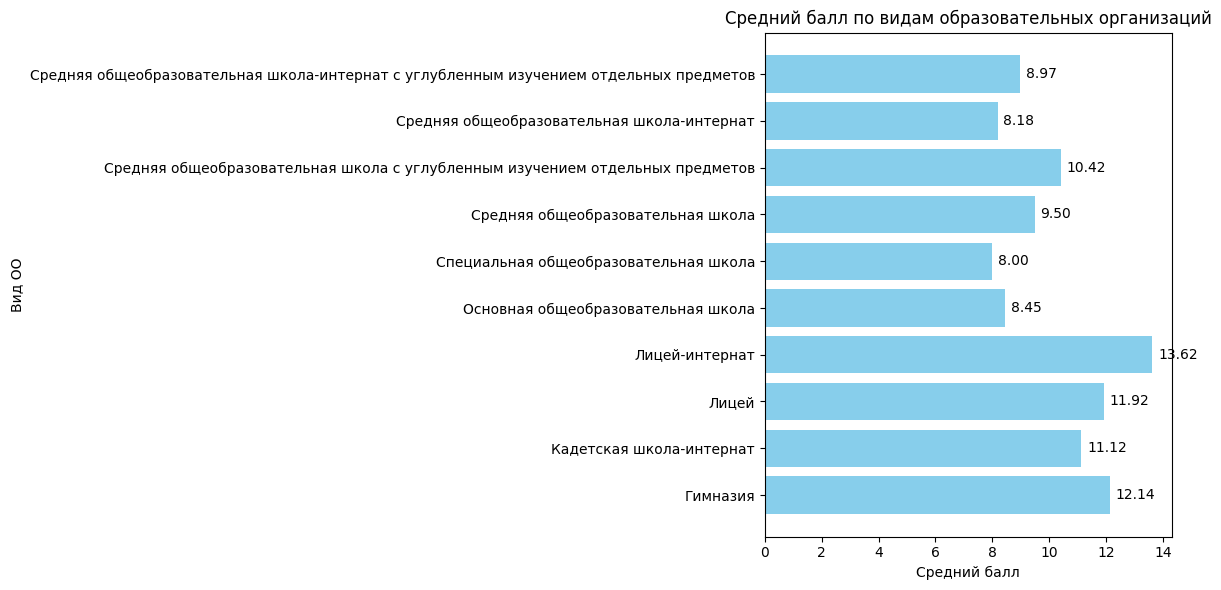

In [31]:
avg_score_type_oo = data_oge.groupby('Вид ОО')['Первичный балл'].mean().reset_index()
# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
plt.barh(avg_score_type_oo['Вид ОО'], avg_score_type_oo['Первичный балл'], color='skyblue')
plt.xlabel('Средний балл')
plt.ylabel('Вид ОО')
plt.title('Средний балл по видам образовательных организаций')

# Добавление значений баллов на график
for index, value in enumerate(avg_score_type_oo['Первичный балл']):
    plt.text(value + 0.2, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()

Как видно из диаграммы, гимназии и лиции, действительно имеют болле высокий средний балл

## "Профили" отличников, хорошистов, двоечников

### Разделение данных

In [32]:
bad_student_oge = data_oge[data_oge['Оцека по 5'] == 2]
so_so_1_student = data_oge[data_oge['Оцека по 5'] == 3]
so_so_2_student = data_oge[data_oge['Оцека по 5'] == 4]
well_student = data_oge[data_oge['Оцека по 5'] == 5]

### "Профили" двоечников

Гипотеза: "Двоечники" больше всего "набирали" баллы в задания с базовым уровнем сложности

In [33]:
bad_student_oge.shape[0]

38

Всего "двоичников" оказалось 38 человек

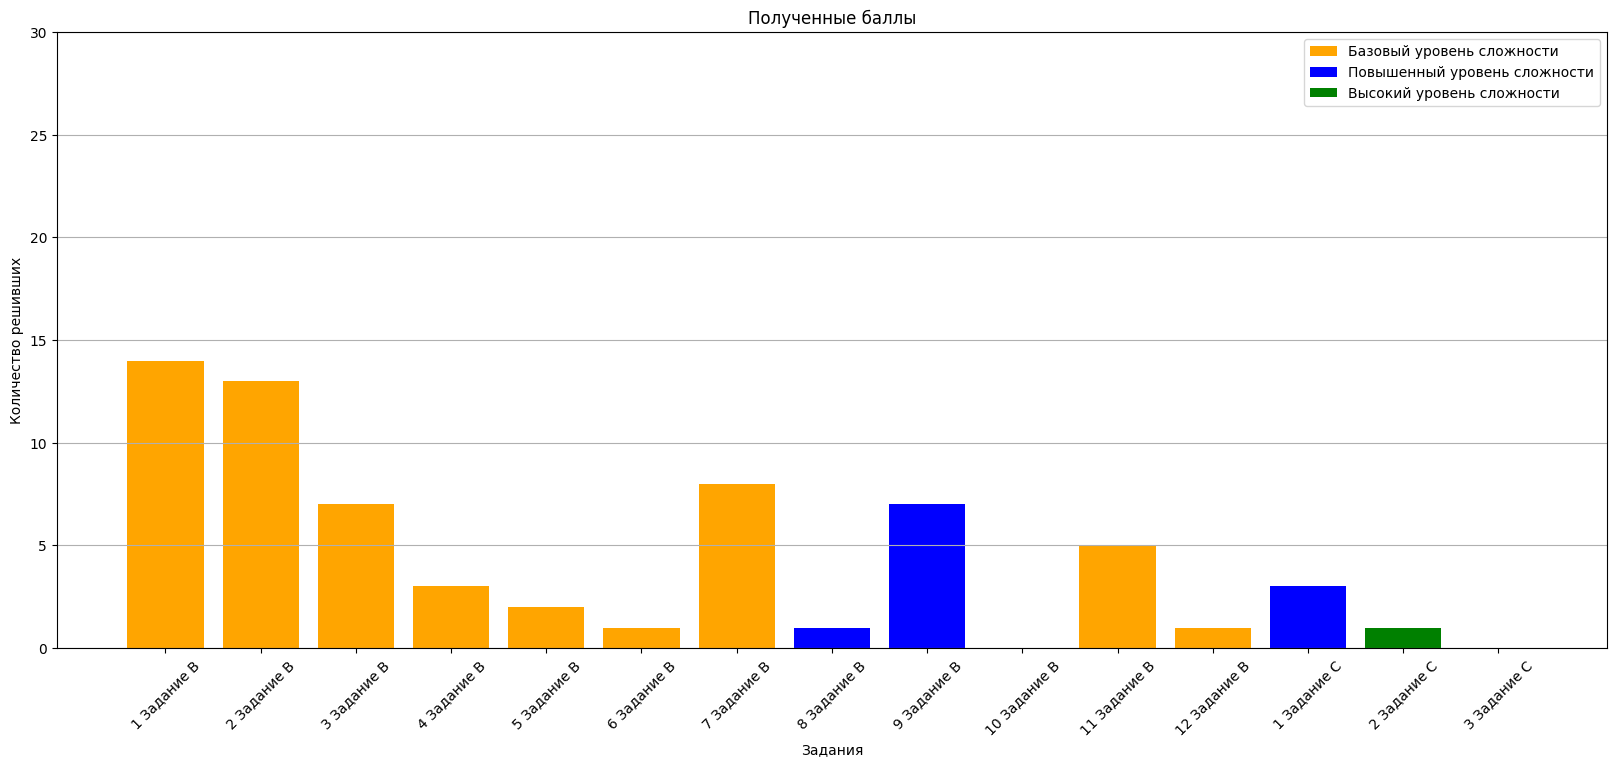

In [34]:
# Создание имен заданий и подсчёт количества людей
task_names = data_oge.columns[9:21].tolist() + data_oge.columns[22:25].tolist()

task_counts = (bad_student_oge[task_names]).sum()

# Создание массива цветов для групп задач
colors = ['orange'] * 7 + ['blue'] * 2 + ['orange'] * 3 + ['blue'] + ['green'] * 2

# Создание сложенной столбчатой диаграммы
plt.figure(figsize=(20, 8))
p1 = plt.bar(task_names, task_counts, color=colors)


# Добавление подписей, заголовка, меток и легенды
plt.ylabel('Количество решивших')
plt.xlabel('Задания')
plt.title('Полученные баллы')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 35, 5))
plt.grid(axis='y')
plt.legend((p1[0], p1[8], p1[-1],), (
    'Базовый уровень сложности', 'Повышенный уровень сложности', 'Высокий уровень сложности'))

plt.show()

Как видно из диаграммы, "двоечники" действительно, "набирали" баллы больше всего из задания с базовым уровнем сложности

Ни один "Двоечник" не смог решить 10 задание из части B и 3 задание из части C

### Профили Троечников

In [35]:
so_so_1_student.shape[0]

3813

"Троечников" всего оказалось 3813 человек

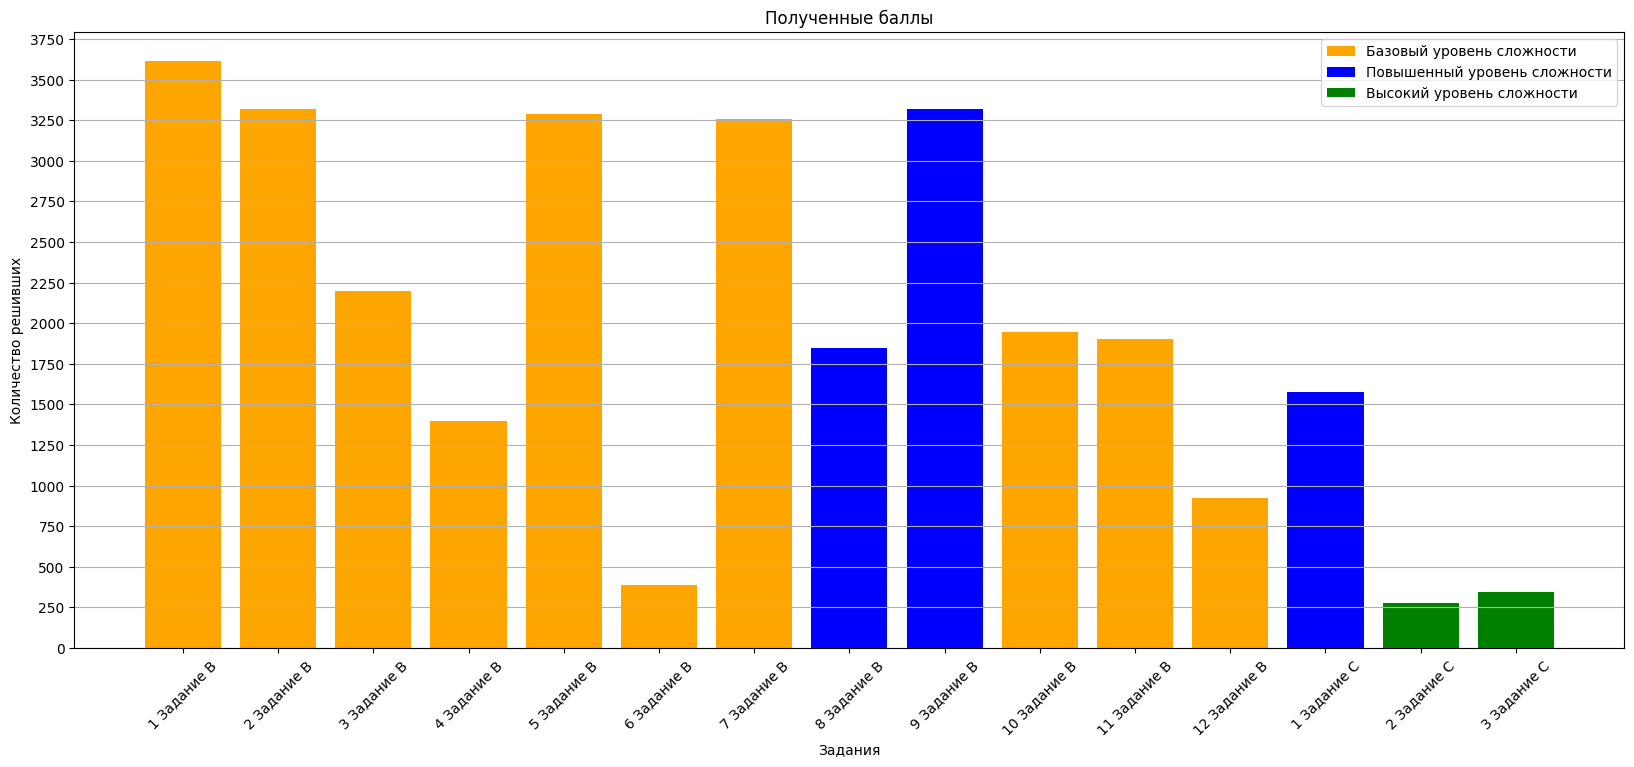

In [36]:
# Создание имен заданий и подсчёт количества людей
task_names = data_oge.columns[9:21].tolist() + data_oge.columns[22:25].tolist()

task_counts = (so_so_1_student[task_names]).sum()

# Создание массива цветов для групп задач
colors = ['orange'] * 7 + ['blue'] * 2 + ['orange'] * 3 + ['blue'] + ['green'] * 2

# Создание сложенной столбчатой диаграммы
plt.figure(figsize=(20, 8))
p1 = plt.bar(task_names, task_counts, color=colors)

# Добавление подписей, заголовка, меток и легенды
plt.ylabel('Количество решивших')
plt.xlabel('Задания')
plt.title('Полученные баллы')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 4000, 250))
plt.grid(axis='y')
plt.legend((p1[0], p1[8], p1[-1],), (
    'Базовый уровень сложности', 'Повышенный уровень сложности', 'Высокий уровень сложности'))

plt.show()


### Профили Хорошистов

In [37]:
so_so_2_student.shape[0]

2007

"Троечников" всего оказалось 2007 человек

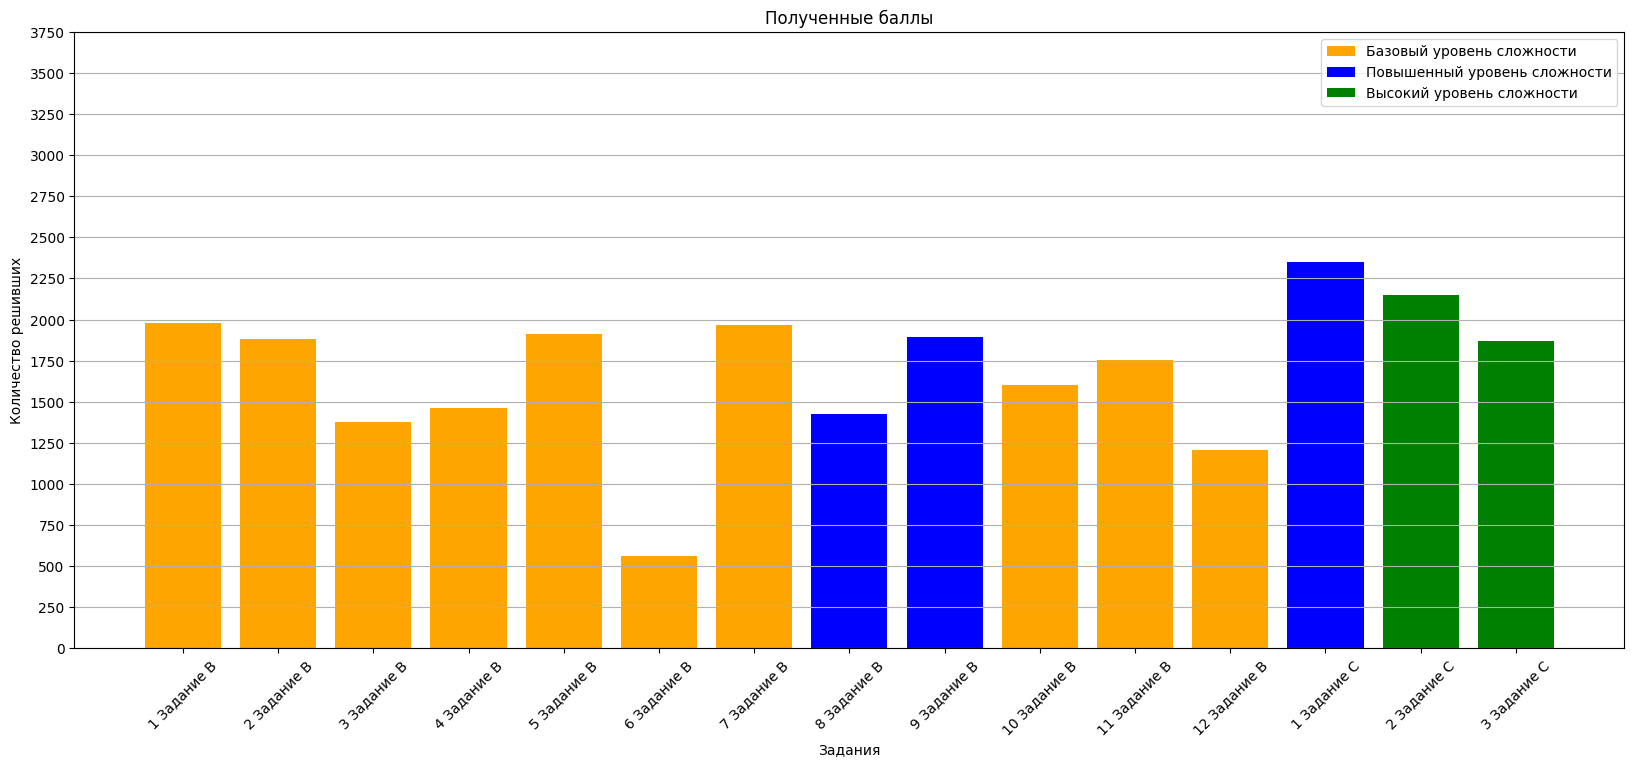

In [38]:
# Создание имен заданий и подсчёт количества людей
task_names = data_oge.columns[9:21].tolist() + data_oge.columns[22:25].tolist()

task_counts = (so_so_2_student[task_names]).sum()

# Создание массива цветов для групп задач
colors = ['orange'] * 7 + ['blue'] * 2 + ['orange'] * 3 + ['blue'] + ['green'] * 2

# Создание сложенной столбчатой диаграммы
plt.figure(figsize=(20, 8))
p1 = plt.bar(task_names, task_counts, color=colors)

# Добавление подписей, заголовка, меток и легенды
plt.ylabel('Количество решивших')
plt.xlabel('Задания')
plt.title('Полученные баллы')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 4000, 250))
plt.grid(axis='y')
plt.legend((p1[0], p1[8], p1[-1],), (
    'Базовый уровень сложности', 'Повышенный уровень сложности', 'Высокий уровень сложности'))

plt.show()


### Профили отличиников

In [39]:
well_student.shape[0]

643

"Отличников оказалось всего 643 человека

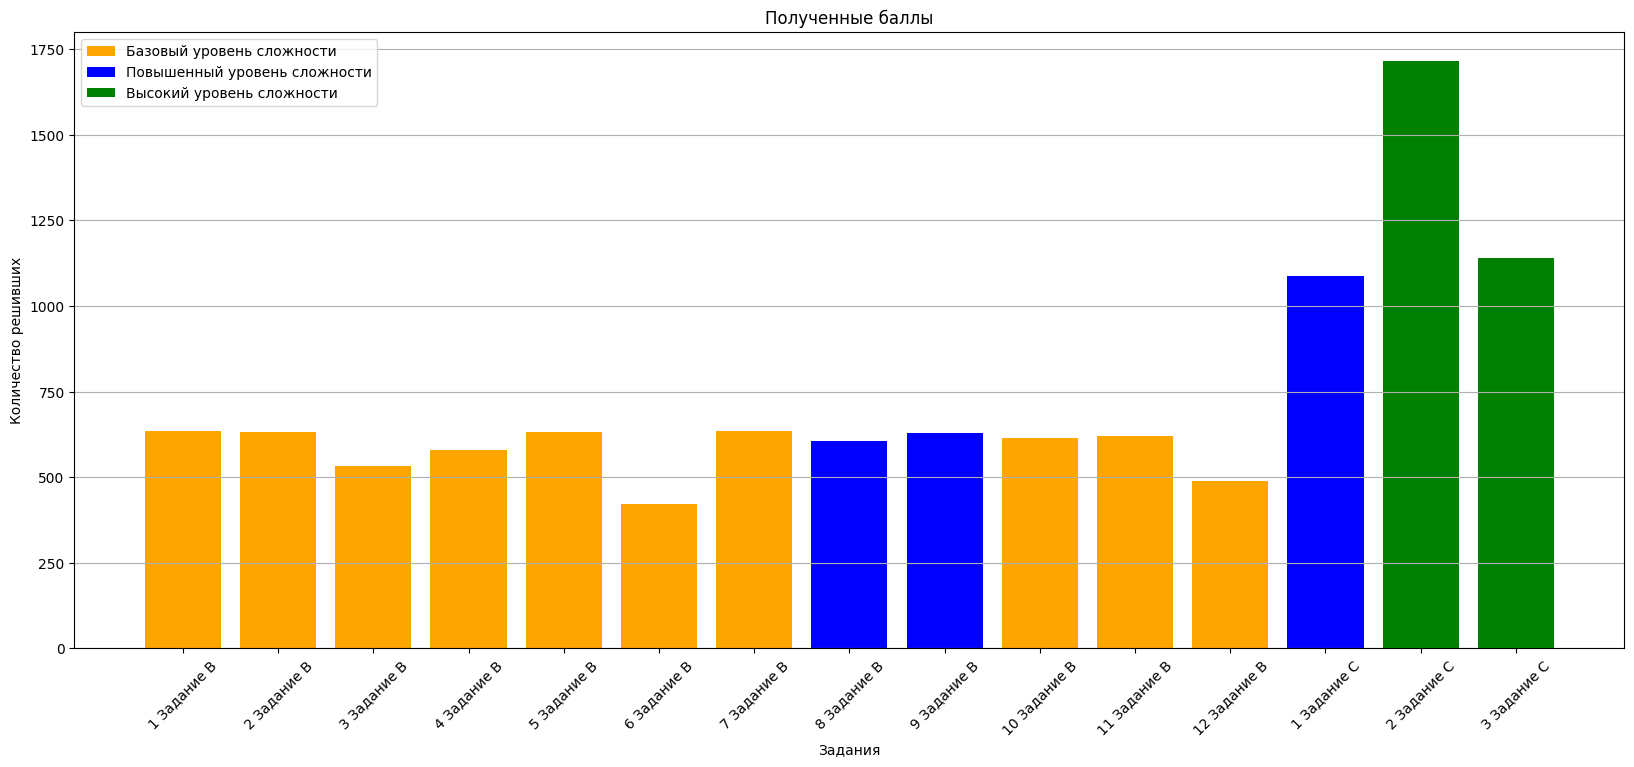

In [40]:
# Создание имен заданий и подсчёт количества людей
task_names = data_oge.columns[9:21].tolist() + data_oge.columns[22:25].tolist()

task_counts = (well_student[task_names]).sum()

# Создание массива цветов для групп задач
colors = ['orange'] * 7 + ['blue'] * 2 + ['orange'] * 3 + ['blue'] + ['green'] * 2

# Создание сложенной столбчатой диаграммы
plt.figure(figsize=(20, 8))
p1 = plt.bar(task_names, task_counts, color=colors)

# Добавление подписей, заголовка, меток и легенды
plt.ylabel('Количество решивших')
plt.xlabel('Задания')
plt.title('Полученные баллы')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 2000, 250))
plt.grid(axis='y')
plt.legend((p1[0], p1[8], p1[-1],), (
    'Базовый уровень сложности', 'Повышенный уровень сложности', 'Высокий уровень сложности'))

plt.show()


Для всех учеников 6 задание из части B вызвало трудности


# Ещё гипотезы

## Корреляция между ЕГЕ и ОГЕ

Существует корреляция между успеваемостью в ОГЭ и результатами в ЕГЭ в одной и той же образовательной организации.

In [41]:
mean_ege_scores = data_ege.groupby('Код ОО')['Первичный балл'].mean().reset_index()
mean_ege_scores.rename(columns={'Первичный балл': 'Средний балл ЕГЭ'}, inplace=True)

mean_oge_scores = data_oge.groupby('Код ОО')['Первичный балл'].mean().reset_index()
mean_oge_scores.rename(columns={'Первичный балл': 'Средний балл ОГЭ'}, inplace=True)

merged_scores = pd.merge(mean_ege_scores, mean_oge_scores, on='Код ОО')
correlation = merged_scores[['Средний балл ЕГЭ', 'Средний балл ОГЭ']].corr().iloc[0, 1]

# Построение графика
fig = px.scatter(merged_scores, x='Средний балл ОГЭ', y='Средний балл ЕГЭ',
                 title=f'Корреляция между средними баллами ОГЭ и ЕГЭ: {correlation:.2f}',
                 labels={'Средний балл ОГЭ': 'Средний балл ОГЭ', 'Средний балл ЕГЭ': 'Средний балл ЕГЭ'})

# Добавление линии идеальной корреляции (наклон 1, из угла в угол)
min_val = min(merged_scores['Средний балл ОГЭ'].min(), merged_scores['Средний балл ЕГЭ'].min())
max_val = max(merged_scores['Средний балл ОГЭ'].max(), merged_scores['Средний балл ЕГЭ'].max())

# Линия идеальной корреляции с добавлением в легенду
fig.add_trace(
    go.Scatter(
        x=[5, 18],
        y=[min_val, max_val],
        mode="lines",
        line=dict(color="red", dash="dash"),
        name="Идеальная корреляция"
    )
)

fig.show()

Корреляция равная 0.36 указывает на положительную, но слабую корреляцию. Это означает, что существует тенденция к тому, что высокие значения ЕГЕ связаны с высокими значениями ОГЕ, но эта связь не является сильной.



## Сравнение задания с кратким ответом и задания, результатом выполнения которых является отдельный файл.

Гипотеза: Колличество балов полученные в заданиях с кратким ответом, больше, чем в заданиях, результатом выполнения которых является отдельный файл.

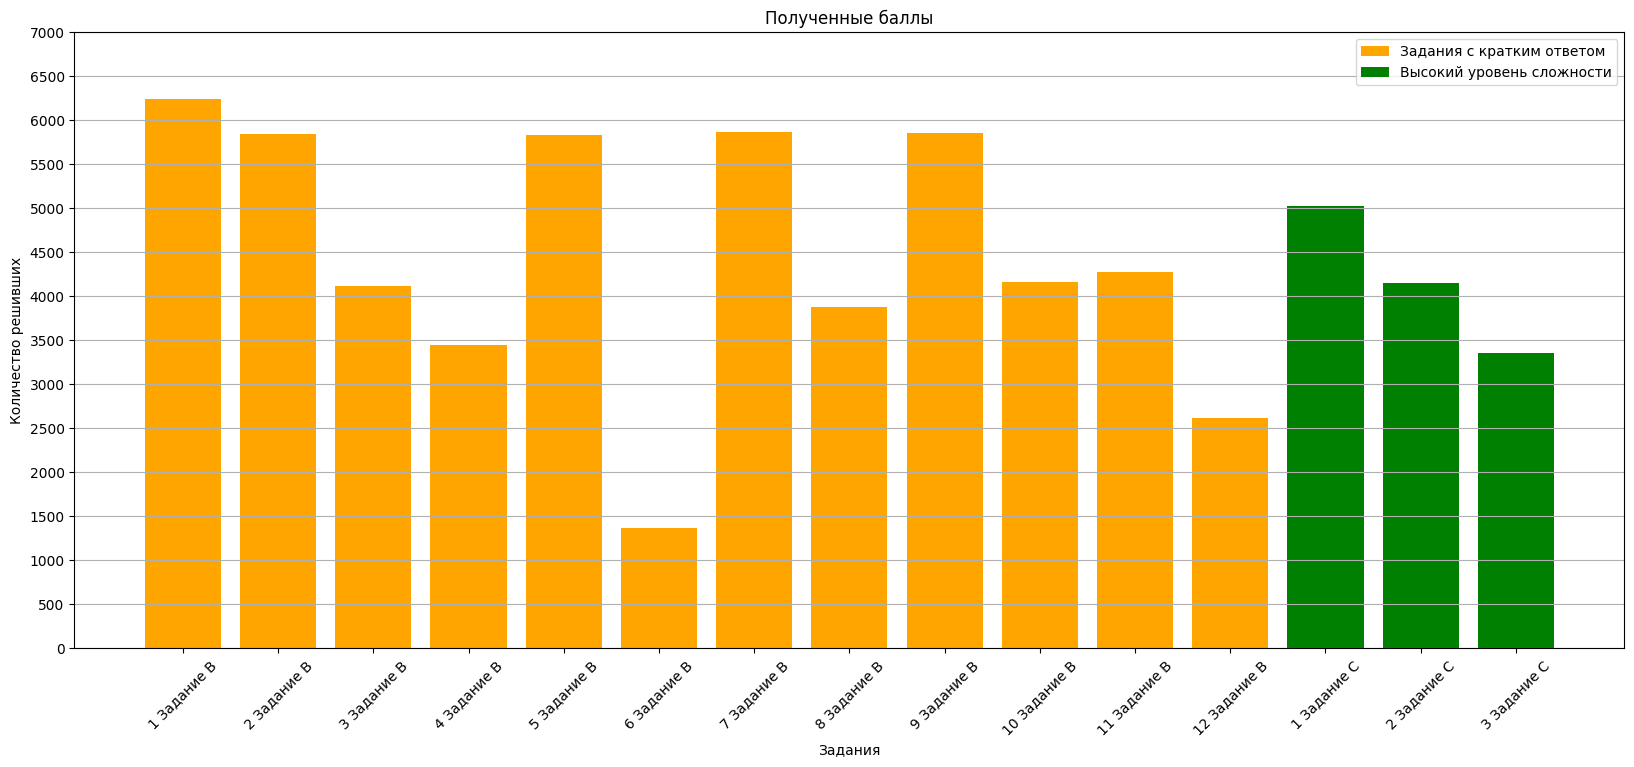

In [42]:
# Создание имен заданий и подсчёт количества людей
task_names = data_oge.columns[9:21].tolist() + data_oge.columns[22:25].tolist()

task_counts = (data_oge[task_names]).sum()

# Создание массива цветов для групп задач
colors = ['orange'] * 12 + ['green'] * 3

# Создание сложенной столбчатой диаграммы
plt.figure(figsize=(20, 8))
p1 = plt.bar(task_names, task_counts, color=colors)

# Добавление подписей, заголовка, меток и легенды
plt.ylabel('Количество решивших')
plt.xlabel('Задания')
plt.title('Полученные баллы')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 7500, 500))
plt.grid(axis='y')
plt.legend((p1[0], p1[-1],), (
    'Задания с кратким ответом', 'Высокий уровень сложности'))

plt.show()


Гипотеза не подтвердилась. Хоть задания, результатом выполнения которых является отдельный файл, кажутся сложнее, но за них можно получить больше баллов, и из-за этого баллы полученные за разные категории заданий похожи